In [1]:
import sklearn
print(sklearn.__version__)


1.3.0


In [2]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install treeinterpreter


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings(action='ignore')
from sklearn.tree import plot_tree
#from sklearn.inspection import PartialDependenceDisplay, partial_dependence


In [5]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [6]:
import sklearn
print("sklearn version:", sklearn.__version__)


sklearn version: 1.3.0


In [7]:
# pip uninstall imbalanced-learn scikit-learn


In [8]:
# pip install scikit-learn==0.24
# pip install imbalanced-learn


In [9]:
#import imblearn

In [10]:
!pip uninstall imbalanced-learn -y
!pip install imbalanced-learn


Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [11]:
import imblearn
import sklearn

print("imblearn version:", imblearn.__version__)
print("sklearn version:", sklearn.__version__)


imblearn version: 0.11.0
sklearn version: 1.3.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
import statistics

numbers = [1, 2, 3, 2, 1, 1, 3, 4, 5, 6, 5, 10, 15, 20, 30]
median = statistics.median(numbers)
mean = statistics.mean(numbers)

print("중앙값:", median)
print("평균:", mean)


중앙값: 4
평균: 7.2


- average_price : 거래가 없을 시, NaN값 발생
- purchase_cycle : 거래가 없거나, 거래가 1회 뿐이라면, NaN값 발생.
- delivery_period, average_shipment_fee, average_distance : 거래가 없을 시, NaN값 발생

In [14]:
df_test_1 = df = pd.read_csv('customer_access_period.csv')
df_test_1

,customer_id,mean_access_period,median_access_period
0,1.0,2072.000000,2072.0
1,2.0,218.000000,218.0
2,3.0,6.310526,1.0
3,4.0,496.000000,496.0
4,5.0,225.000000,225.0
...,...,...,...
99995,99996.0,109.000000,109.0
99996,99997.0,827.000000,827.0
99997,99998.0,15.444444,1.0
99998,99999.0,2118.000000,2118.0


In [15]:
df_test_2 = df = pd.read_csv('monetary.csv')
df_test_2

,customer_id,price_per_year
0,2870,0.000000e+00
1,8193,0.000000e+00
2,7279,2.472727e+07
3,88813,0.000000e+00
4,82542,8.853507e+04
...,...,...
99995,34743,8.936760e+06
99996,72065,6.614419e+06
99997,32818,1.450559e+07
99998,75597,0.000000e+00


In [16]:
df = pd.read_csv('model_data3.csv')
df_test_3 = df
df_test_3

,churn,gender,age,device,device_version2,home_location,customer_id,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join
0,1,F,28,iPhone,14,Sumatera Barat,2870,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07
1,1,F,31,Android,2,Jakarta Raya,8193,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07
2,0,M,35,iPad,4,Nusa Tenggara Barat,7279,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08
3,1,M,33,iPad,14,Kalimantan Timur,88813,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10
4,1,M,24,iPhone,10,Kalimantan Selatan,82542,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96273,0,M,24,Android,4,Lampung,34743,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10
96274,0,M,26,Android,8,Aceh,72065,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11
96275,0,F,31,Android,11,Maluku,32818,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09
96276,1,M,24,Android,7,Jambi,75597,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05


In [17]:
df_test_3['churn'].value_counts(normalize=True)

1    0.82537
0    0.17463
Name: churn, dtype: float64

In [18]:
df_test_4 = pd.read_csv('model_data4.csv')
df_test_4['churn'].value_counts(normalize=True)

1    0.748645
0    0.251355
Name: churn, dtype: float64

In [19]:
# # df_test_4의 customer_id와 churn을 사용하여 df_test_3에 merge 수행
# df_test_3 = df_test_3.drop('churn', axis=1).merge(
#     df_test_4[['customer_id', 'churn']], 
#     on='customer_id', 
#     how='left'
# )

In [20]:
df_test_3['churn'].value_counts(normalize=True)

1    0.82537
0    0.17463
Name: churn, dtype: float64

In [21]:
merged_df = df_test_4.merge(df_test_2[['customer_id', 'price_per_year']], on='customer_id', how='left')
merged_df

,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join,price_per_year
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,0.000000,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07,0.000000e+00
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.000000,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07,0.000000e+00
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,5386.117647,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08,2.472727e+07
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,0.000000,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10,0.000000e+00
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,0.000000,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04,8.853507e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96273,34743,0,M,24,Android,4,Lampung,1.590909,324990.142857,0.545455,7045.166667,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10,8.936760e+06
96274,72065,0,M,26,Android,8,Aceh,0.719298,557404.097561,0.228070,5376.692308,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11,6.614419e+06
96275,32818,0,F,31,Android,11,Maluku,2.042553,376070.156250,0.765957,4931.111111,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09,1.450559e+07
96276,75597,1,M,24,Android,7,Jambi,0.000000,0.000000,0.000000,0.000000,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05,0.000000e+00


In [22]:
merged_df = merged_df.merge(df_test_1[['customer_id', 'mean_access_period']], on='customer_id', how='left')
merged_df

,customer_id,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,...,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join,price_per_year,mean_access_period
0,2870,1,F,28,iPhone,14,Sumatera Barat,0.000000,0.000000,0.000000,...,37,2019,1107,6.000000,50000.000000,4052.667143,1.975650,2019-07,0.000000e+00,1106.000000
1,8193,1,F,31,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,...,61,2017,1842,6.000000,50000.000000,4052.667143,1.975650,2017-07,0.000000e+00,1841.000000
2,7279,0,M,35,iPad,4,Nusa Tenggara Barat,3.291667,414681.556962,0.708333,...,24,2020,2,3.075949,8860.759494,752.832362,0.226744,2020-08,2.472727e+07,4.078261
3,88813,1,M,33,iPad,14,Kalimantan Timur,0.000000,0.000000,0.000000,...,10,2021,302,6.000000,50000.000000,4052.667143,1.975650,2021-10,0.000000e+00,301.000000
4,82542,1,M,24,iPhone,10,Kalimantan Selatan,0.062500,115702.000000,0.000000,...,16,2021,471,1.000000,0.000000,0.000000,2.996627,2021-04,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96273,34743,0,M,24,Android,4,Lampung,1.590909,324990.142857,0.545455,...,22,2020,4,3.400000,8000.000000,522.233922,0.209877,2020-10,8.936760e+06,5.897727
96274,72065,0,M,26,Android,8,Aceh,0.719298,557404.097561,0.228070,...,57,2017,32,3.097561,9634.146341,1443.259657,0.767386,2017-11,6.614419e+06,8.745665
96275,32818,0,F,31,Android,11,Maluku,2.042553,376070.156250,0.765957,...,47,2018,2,3.145833,8489.583333,1101.739088,0.136396,2018-09,1.450559e+07,5.285024
96276,75597,1,M,24,Android,7,Jambi,0.000000,0.000000,0.000000,...,27,2020,792,6.000000,50000.000000,4052.667143,1.975650,2020-05,0.000000e+00,791.000000


In [23]:
merged_df['churn'].value_counts()

1    72078
0    24200
Name: churn, dtype: int64

In [24]:
merged_df['churn'].value_counts(normalize=True)


1    0.748645
0    0.251355
Name: churn, dtype: float64

In [25]:
# #df = pd.read_csv('model_data.csv')

In [26]:
#df = pd.read_csv('model_data3.csv')
#df

In [27]:
# df.info()

In [28]:
#df = pd.read_csv('model_data2.csv')
#df

In [29]:
df = merged_df.copy()

In [30]:
len(df.home_location.unique())

33

In [31]:
#df = df.drop('age', axis=1)
#df = df.drop('device_version2', axis=1)

#df

In [32]:
# df = pd.read_csv('model_data4.csv')
# df

In [33]:
df['churn'].value_counts(normalize=True)

1    0.748645
0    0.251355
Name: churn, dtype: float64

In [34]:
df = merged_df
df = df.drop('customer_id', axis=1)

In [35]:
# 2022-04-01 이후 가입한 고객 필터링
new_customers_df = df[df['first_join'] >= '2022-04'].copy()
new_customers_df

,churn,gender,age,device,device_version2,home_location,month_tr,average_price,promo_count,average_promo_amount,join_period,first_join_year,purchase_cycle,delivery_period,average_shipment_fee,average_distance,churn_risk_index,first_join,price_per_year,mean_access_period
11,1,F,28,Android,2,Jakarta Raya,0.000000,0.000000,0.000000,0.0,2,2022,44,6.000000,50000.000000,4052.667143,1.975650,2022-06,0.000000e+00,43.000000
21,1,M,29,Android,3,Jawa Tengah,0.000000,0.000000,0.000000,0.0,4,2022,114,6.000000,50000.000000,4052.667143,1.975650,2022-04,0.000000e+00,113.000000
35,1,F,28,Android,3,Jambi,0.000000,0.000000,0.000000,0.0,3,2022,78,6.000000,50000.000000,4052.667143,1.975650,2022-05,0.000000e+00,77.000000
50,1,M,36,Android,7,Jakarta Raya,0.000000,0.000000,0.000000,0.0,3,2022,64,6.000000,50000.000000,4052.667143,1.975650,2022-05,0.000000e+00,63.000000
68,0,F,28,Android,7,Kalimantan Barat,1.333333,213487.500000,0.666667,3259.5,3,2022,16,1.750000,6250.000000,456.951921,0.888889,2022-05,4.390025e+06,7.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96205,1,F,25,Android,2,Jawa Timur,0.000000,0.000000,0.000000,0.0,4,2022,121,6.000000,50000.000000,4052.667143,1.975650,2022-04,0.000000e+00,120.000000
96242,0,M,23,Android,4,Jawa Timur,0.750000,204793.000000,0.500000,5308.0,4,2022,24,2.000000,5000.000000,177.813802,0.960000,2022-04,5.056764e+06,16.500000
96245,1,M,22,Android,2,Lampung,0.500000,105107.000000,0.000000,0.0,2,2022,35,4.000000,10000.000000,1448.203703,0.222679,2022-06,1.036866e+06,35.000000
96249,1,F,25,Android,4,Jakarta Raya,0.000000,0.000000,0.000000,0.0,1,2022,2,6.000000,50000.000000,4052.667143,1.975650,2022-07,0.000000e+00,1.000000


In [36]:
# 'first_join' 컬럼이 2022-04 이전인 사람들만 선택
df = df[df['first_join'] < '2022-04'] # 기존 고객

# 인덱스 리셋
df.reset_index(drop=True, inplace=True)

#df = df.drop(columns=['customer_id', 'purchase_cycle', 'home_location', 'first_join','device', 'first_join_year','age','gender','device_version2'])
df = df.drop(columns=['purchase_cycle', 'home_location', 'first_join','device', 'first_join_year','age','gender','device_version2'])
#new_customers_df = new_customers_df.drop(columns=['customer_id','purchase_cycle', 'home_location', 'first_join','device', 'first_join_year','age','gender','device_version2'])
new_customers_df = new_customers_df.drop(columns=['purchase_cycle', 'home_location', 'first_join','device', 'first_join_year','age','gender','device_version2'])
# 결과 확인
df


,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88436 entries, 0 to 88435
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 88436 non-null  int64  
 1   month_tr              88436 non-null  float64
 2   average_price         88436 non-null  float64
 3   promo_count           88436 non-null  float64
 4   average_promo_amount  88436 non-null  float64
 5   join_period           88436 non-null  int64  
 6   delivery_period       88436 non-null  float64
 7   average_shipment_fee  88436 non-null  float64
 8   average_distance      88436 non-null  float64
 9   churn_risk_index      88436 non-null  float64
 10  price_per_year        88436 non-null  float64
 11  mean_access_period    88436 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 8.1 MB


# 데이터 타입

- 범주형 데이터

gender - 성별을 나타냄 (예: 'M', 'F') - 삭제

device - 사용하는 기기를 나타냄 (예: 'iPhone', 'Android', 'iPad') - 삭제

home_location - 집 주소나 지역을 나타냄 (예: 'Jakarta Raya', 'Sumatera Barat') - 삭제

first_join - 가입한 연도와 월을 나타냄 (예: '2019-07') - 삭제

## 범주형 데이터 모두 삭제 (모델별 특성 중요도 모두 낮음, 의미없는 데이터를 제거하여 모델 성능 향상(학습 효율성, 과적합 감소 등)

- 수치형 데이터

churn - 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)

age - 고객의 나이

device_version2 - 기기의 버전- 삭제

month_tr - 월 평균 거래 횟수 (전체 거래 횟수 / 가입일로부터 경과한 개월수)

average_price - 고객의 평균 구매 금액 ( 고객 아이디별 tr 데이터 price 컬럼의 합 / 전체 거래 횟수)

promo_count - 고객의 프로모션 사용 거래 횟수 / 가입일로부터 경과한 개월수

average_promo_amount - 고객이 프로모션 사용 시, 평균 프로모션 금액

join_period -가입 이후 경과한 개월수

first_join_year - 처음 가입한 연도 - 삭제

purchase_cycle - 평균 구매 주기 - 삭제. 데이터 누수 우려 및 전문가 판단 필요.

delivery_period - 평균 배송 기간

average_shipment_fee - 평균 배송료

average_distance - 평균 배송 거리

churn_risk_index - 이탈 위험 지수

## 모델별 특성 중요도가 공통적으로 낮은 컬럼들 삭제
(GPT : 특성 중요도가 낮아도 해당 컬럼이 정말 무의미한지 판단하려면 도메인 지식이 필요)

# 사용 컬럼

- churn 
: 고객 이탈 여부 (타겟 컬럼)
- month_tr 
: 월 평균 거래 횟수 (전체 거래 횟수 / 가입일로부터 경과한 개월수)
- average_price
: 고객의 평균 구매 금액 ( 고객 아이디별 tr 데이터 price 컬럼의 합 / 전체 거래 횟수)
- promo_count
: 고객의 프로모션 사용 거래 횟수 / 가입일로부터 경과한 개월수
- average_promo_amount
: 고객이 프로모션 사용 시, 평균 프로모션 금액
- join_period
: 가입 이후 경과한 개월수
- delivery_period
: 평균 배송 기간
- average_shipment_fee
: 평균 배송료
- average_distance
: 평균 배송 거리
- churn_risk_index
: 이탈 위험 지수 (마지막 거래로부터의 경과일 / 고객의 평균 거래 주기)

# 학습 데이터 특성 및 선정이유

- 모두 수치형 데이터들임.
- 범주형 데이터 또한 중요 지표가 될 것이라 예상해 초기 학습 데이터에 포함시킴.(특정 지역에 이탈 고객이 많을 것이다.)
- 각 베이스 모델에 적용 후, 특성 중요도를 추출하니 세 모델 모두 범주형 데이터는 무의미했음.
- 고객의 거래여부에 주목한 만큼, 고객별 특징이라 할 수 있는 거래 횟수, 거래 금액, 가입 기간 등을 고려했고, 배송 관련 이슈가 있을 것이라 예상하여 관련 데이터를 추가함.



# 고객 이탈 예측 모델에서의 성능 지표

고객 이탈 예측 모델의 경우, 일반적으로 정확도(accuracy)만으로는 충분한 평가 지표가 되지 않습니다. 그 이유는 이탈할 고객과 그렇지 않은 고객의 비율이 불균형할 가능성이 있기 때문입니다. 즉, 모든 고객을 "이탈하지 않을 것이다"라고 예측해도 높은 정확도를 얻을 수 있지만, 이는 실제 비즈니스 상황에서는 바람직하지 않습니다.

고객 이탈 예측 모델에서는 다음과 같은 평가 지표들을 고려해볼 수 있습니다:

1. Precision (정밀도): 이탈할 것이라고 예측한 고객 중 실제로 이탈하는 고객의 비율.
2. Recall (재현율): 실제로 이탈하는 고객 중 이탈할 것이라고 올바르게 예측된 고객의 비율.
3. F1-Score: Precision과 Recall의 조화 평균.
4. AUC-ROC (Area Under the Receiver Operating Characteristic Curve): 모델의 성능을 다양한 임계값에서 평가하는 지표. 1에 가까울수록 좋은 모델.
5. Confusion Matrix: 이탈할 것이라고 예측한 수와 실제로 이탈한 수, 이탈하지 않을 것이라고 예측한 수와 실제로 이탈하지 않은 수를 표로 나타낸 것.

실제 비즈니스 문제에서는 고객 이탈을 미리 예측하고 대응할 수 있다면 큰 비용 절감 효과가 있을 것입니다. 따라서 재현율(Recall)이 중요할 수 있습니다. 이탈하는 고객을 놓치지 않는 것이 중요하다면 Recall을 중요하게 보고, 이탈하지 않는 고객에게 불필요한 프로모션 등을 제공하는 비용을 줄이고 싶다면 Precision을 중요하게 볼 수 있습니다.

최종적으로는 비즈니스 목적과 비용-편익 분석을 통해 어떤 평가 지표를 중점적으로 고려할지 결정하는 것이 좋습니다.

# 이탈 예측 모델 구현


- XGBoost

: XGBoost는 누락된 값을 처리하는 데 내장된 로직을 가지고 있습니다. 트리를 구성할 때, 각 노드는 누락된 값을 왼쪽 자식 또는 오른쪽 자식으로 보낼지의 기본 방향을 학습합니다. 따라서 누락된 값에 대한 처리를 따로 하지 않아도 되지만, 경우에 따라 데이터에 누락된 값을 평균, 중앙값 등으로 채우는 것이 더 좋은 결과를 가져올 수 있습니다.

- LightGBM

: LightGBM 또한 누락된 값을 처리할 수 있는 기능을 내장하고 있습니다. XGBoost와 유사한 방식으로 작동합니다.

- CatBoost

: CatBoost는 카테고리형 변수의 처리에서 뛰어난 성능을 보이는데, 누락된 값을 하나의 별도의 카테고리로 처리할 수 있습니다.



In [38]:
churn_counts = df['churn'].value_counts(normalize=True) * 100

print(churn_counts)


1    74.894839
0    25.105161
Name: churn, dtype: float64


# 로지스틱 회귀 모델

In [39]:
#ㅇ

In [40]:
df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88436 entries, 0 to 88435
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 88436 non-null  int64  
 1   month_tr              88436 non-null  float64
 2   average_price         88436 non-null  float64
 3   promo_count           88436 non-null  float64
 4   average_promo_amount  88436 non-null  float64
 5   join_period           88436 non-null  int64  
 6   delivery_period       88436 non-null  float64
 7   average_shipment_fee  88436 non-null  float64
 8   average_distance      88436 non-null  float64
 9   churn_risk_index      88436 non-null  float64
 10  price_per_year        88436 non-null  float64
 11  mean_access_period    88436 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 8.1 MB


In [42]:
df.columns

Index(['churn', 'month_tr', 'average_price', 'promo_count',
       'average_promo_amount', 'join_period', 'delivery_period',
       'average_shipment_fee', 'average_distance', 'churn_risk_index',
       'price_per_year', 'mean_access_period'],
      dtype='object')

In [43]:
# 범주형 변수에 대한 원-핫 인코딩
#df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True)
df_encoded = df
# 원-핫 인코딩된 데이터에서 특성과 타겟 분리
X = df_encoded.drop(['churn'], axis=1)
y = df_encoded["churn"]

# 데이터 분할
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 데이터 정규화
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [44]:
# 로지스틱 회귀 베이스 모델
base_model1 = LogisticRegression(max_iter=1000)  # max_iter를 높여 수렴에 도움을 줍니다.
base_model1.fit(X_train, y_train)  # 여기에서 스케일링(데이터 정규화) 하지 않은 데이터를 사용합니다.


LogisticRegression(max_iter=1000)

In [45]:
# 로지스틱 회귀 베이스 모델
base_model = LogisticRegression(max_iter=1000)  # max_iter를 높여 수렴에 도움을 줍니다.
base_model.fit(X_train_scaled, y_train)  # 여기에서 스케일링된 데이터를 사용합니다.


LogisticRegression(max_iter=1000)

In [46]:
# 정규화 전

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_pred = base_model1.predict(X_train)
print("Train Accuracy: {:.3f}".format(accuracy_score(y_train, y_train_pred)))  # 수정된 부분
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred = base_model1.predict(X_val)
print("\nValidation Accuracy: {:.3f}".format(accuracy_score(y_val, y_val_pred)))  # 수정된 부분
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))


Train Accuracy: 0.967
Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13321
           1       0.98      0.98      0.98     39740

    accuracy                           0.97     53061
   macro avg       0.96      0.95      0.96     53061
weighted avg       0.97      0.97      0.97     53061


Validation Accuracy: 0.968
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4440
           1       0.98      0.98      0.98     13247

    accuracy                           0.97     17687
   macro avg       0.96      0.96      0.96     17687
weighted avg       0.97      0.97      0.97     17687



In [47]:
# 정규화 후

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_pred = base_model.predict(X_train_scaled)
print("Train Accuracy: {:.3f}".format(accuracy_score(y_train, y_train_pred)))  # 수정된 부분
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred = base_model.predict(X_val_scaled)
print("\nValidation Accuracy: {:.3f}".format(accuracy_score(y_val, y_val_pred)))  # 수정된 부분
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))



Train Accuracy: 0.995
Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13321
           1       1.00      1.00      1.00     39740

    accuracy                           1.00     53061
   macro avg       1.00      0.99      0.99     53061
weighted avg       1.00      1.00      1.00     53061


Validation Accuracy: 0.995
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4440
           1       1.00      1.00      1.00     13247

    accuracy                           0.99     17687
   macro avg       0.99      0.99      0.99     17687
weighted avg       0.99      0.99      0.99     17687



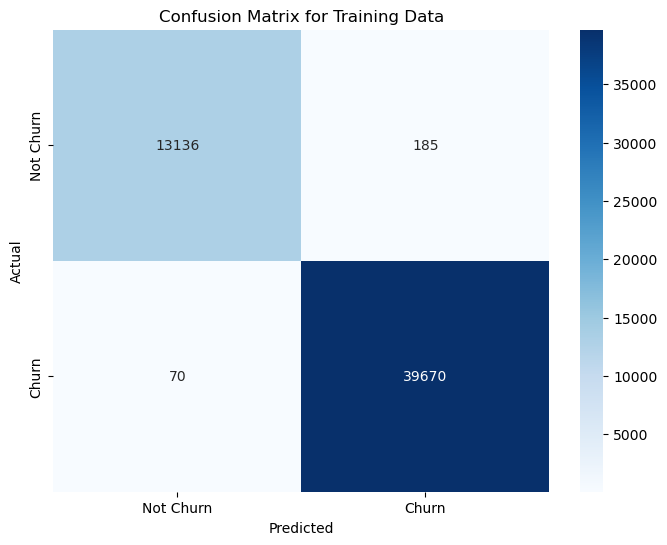

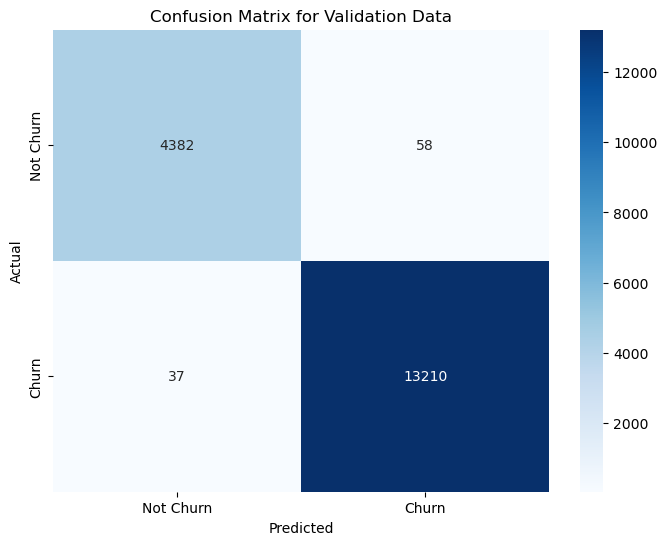

In [48]:
# 훈련 데이터에 대한 혼돈 행렬
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8,6))
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Data')
plt.show()

# 검증 데이터에 대한 혼돈 행렬
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(val_conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Data')
plt.show()


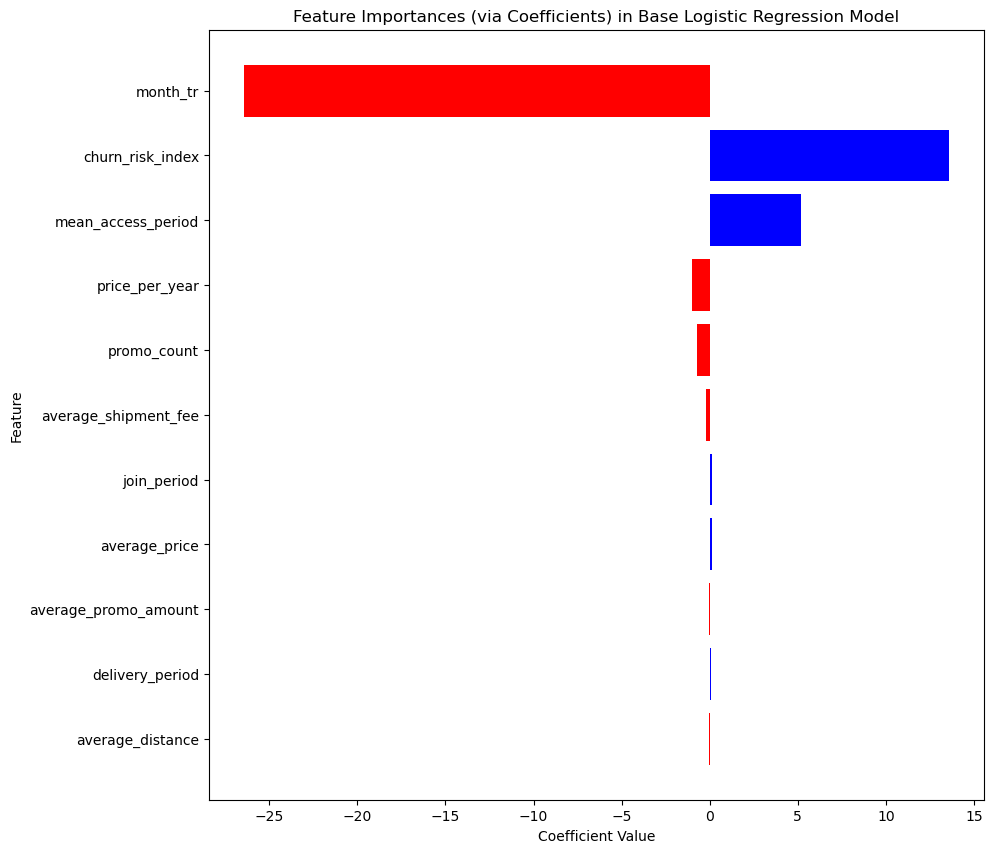

In [49]:
# 로지스틱 회귀 모델의 회귀 계수 (특성 중요도)

# 로지스틱 회귀 계수 추출
coefficients = base_model.coef_[0]

# 특성 이름과 계수를 연결하여 정렬
features = X.columns
sorted_idx = np.argsort(np.abs(coefficients))

# 계수 값의 부호에 따른 색상 지정
colors = ['red' if c < 0 else 'blue' for c in coefficients[sorted_idx]]

# 시각화
plt.figure(figsize=(10, 10))
plt.barh(features[sorted_idx], coefficients[sorted_idx], align='center', color=colors)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importances (via Coefficients) in Base Logistic Regression Model")
plt.show()


# purchase_cycle의 계수가 양수 : 거래 주기가 증가할수록 이탈 확률이 높아짐
# first_join_year의 계수가 음수 : 최근 가입한 고객일수록 이탈 확률이 낮아짐

In [50]:
X

,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...
88431,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


# 로지스틱 회귀 모델 개선

1. 타겟 불균형 문제 해결
- 오버샘플링 : 소수 클래스의 샘플 수 증가 (SMOTE)
- 언더샘플링 : 다수 클래스의 샘플 수 감소
- 조합 : 오버샘플링+언더샘플링


2. 과적합 방지


3. k-겹 교차 검증 및 그리드 서치

In [51]:
# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

# 리샘플링 전의 클래스 분포 확인
print('Original dataset shape:', Counter(y_train))

# 훈련 데이터에 오버샘플링 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 샘플링된 데이터 크기 확인
print('Resampled dataset shape:', Counter(y_train_resampled))

Original dataset shape: Counter({1: 39740, 0: 13321})
Resampled dataset shape: Counter({0: 39740, 1: 39740})


2. 그리드 서치를 이용하여 최적의 파라미터 파악

In [52]:
# 'penalty'가 'l1'일 때 'solver'가 'newton-cg', 'lbfgs', 'sag'는 사용될 수 없음

In [53]:
# best_params = {'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs'}

In [54]:
# 최적의 파라미터를 사용한 로지스틱 회귀 모델
improved_model = LogisticRegression(C=0.001, penalty='none', solver='lbfgs', max_iter=1000)
improved_model.fit(X_train_resampled, y_train_resampled)

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_pred_improved = improved_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred_improved)

print("Train Accuracy: {:.3f}".format(train_accuracy))
print("Train Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_improved))

# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred_improved = improved_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred_improved)

print("\nValidation Accuracy: {:.3f}".format(val_accuracy))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_improved))

Train Accuracy: 0.996
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39740
           1       1.00      1.00      1.00     39740

    accuracy                           1.00     79480
   macro avg       1.00      1.00      1.00     79480
weighted avg       1.00      1.00      1.00     79480


Validation Accuracy: 0.995
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4440
           1       1.00      1.00      1.00     13247

    accuracy                           0.99     17687
   macro avg       0.99      0.99      0.99     17687
weighted avg       0.99      0.99      0.99     17687



In [55]:
# 과적합이 의심됨. L1, L2 정규화 적용 필요

In [56]:
# 스케일링된 시험 데이터로 예측
y_test_pred_improved = improved_model.predict(X_test_scaled)

# 성능 평가
# y_test는 시험 데이터의 레이블입니다.
print("\nTest Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred_improved)))  # 수정된 부분
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_improved))



Test Accuracy: 0.995
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4441
           1       1.00      1.00      1.00     13247

    accuracy                           1.00     17688
   macro avg       0.99      1.00      0.99     17688
weighted avg       1.00      1.00      1.00     17688



In [57]:
# L1 정규화 적용
improved_model_l1 = LogisticRegression(C=0.001, penalty='l1', solver='saga', max_iter=1000)
improved_model_l1.fit(X_train_resampled, y_train_resampled)

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_pred_improved = improved_model_l1.predict(X_train_resampled)
train_accuracy_l1 = accuracy_score(y_train_resampled, y_train_pred_improved)
print("Train Accuracy: {:.3f}".format(train_accuracy_l1))
print("Train Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_improved))

# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred_improved = improved_model_l1.predict(X_val_scaled)
val_accuracy_l1 = accuracy_score(y_val, y_val_pred_improved)
print("\nValidation Accuracy: {:.3f}".format(val_accuracy_l1))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_improved))

Train Accuracy: 0.988
Train Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     39740
           1       0.99      0.98      0.99     39740

    accuracy                           0.99     79480
   macro avg       0.99      0.99      0.99     79480
weighted avg       0.99      0.99      0.99     79480


Validation Accuracy: 0.983
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4440
           1       1.00      0.98      0.99     13247

    accuracy                           0.98     17687
   macro avg       0.97      0.99      0.98     17687
weighted avg       0.98      0.98      0.98     17687



In [58]:
# 스케일링된 시험 데이터로 예측
y_test_pred_improved = improved_model_l1.predict(X_test_scaled)

# 성능 평가
print("\nTest Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred_improved)))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_improved))



Test Accuracy: 0.984
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4441
           1       1.00      0.98      0.99     13247

    accuracy                           0.98     17688
   macro avg       0.97      0.99      0.98     17688
weighted avg       0.98      0.98      0.98     17688



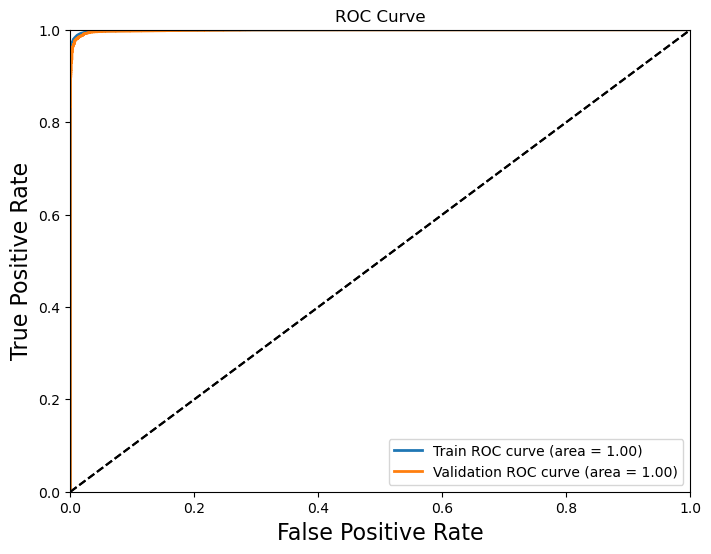

In [59]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# 훈련 데이터에 대한 ROC 커브
y_train_prob_improved = improved_model_l1.predict_proba(X_train_resampled)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_prob_improved)
roc_auc_train = auc(fpr_train, tpr_train)

# 검증 데이터에 대한 ROC 커브
y_val_prob_improved = improved_model_l1.predict_proba(X_val_scaled)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob_improved)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train, tpr_train, "Train ROC curve (area = {:.2f})".format(roc_auc_train))
plot_roc_curve(fpr_val, tpr_val, "Validation ROC curve (area = {:.2f})".format(roc_auc_val))
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.show()


In [60]:
# L2 정규화 적용
improved_model_l2 = LogisticRegression(C=0.001, penalty='l2', solver='lbfgs', max_iter=1000)
improved_model_l2.fit(X_train_resampled, y_train_resampled)

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_pred_improved = improved_model_l2.predict(X_train_resampled)
train_accuracy_l2 = accuracy_score(y_train_resampled, y_train_pred_improved)
print("Train Accuracy: {:.3f}".format(train_accuracy_l2))
print("Train Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_improved))

# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred_improved = improved_model_l2.predict(X_val_scaled)
val_accuracy_l2 = accuracy_score(y_val, y_val_pred_improved)
print("\nValidation Accuracy: {:.3f}".format(val_accuracy_l2))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_improved))

Train Accuracy: 0.960
Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     39740
           1       0.99      0.93      0.96     39740

    accuracy                           0.96     79480
   macro avg       0.96      0.96      0.96     79480
weighted avg       0.96      0.96      0.96     79480


Validation Accuracy: 0.942
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4440
           1       0.99      0.93      0.96     13247

    accuracy                           0.94     17687
   macro avg       0.91      0.96      0.93     17687
weighted avg       0.95      0.94      0.94     17687



In [61]:
# 스케일링된 시험 데이터로 예측
y_test_pred_improved = improved_model_l2.predict(X_test_scaled)

# 성능 평가
print("\nTest Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred_improved)))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_improved))



Test Accuracy: 0.949
Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4441
           1       1.00      0.94      0.96     13247

    accuracy                           0.95     17688
   macro avg       0.92      0.96      0.94     17688
weighted avg       0.96      0.95      0.95     17688



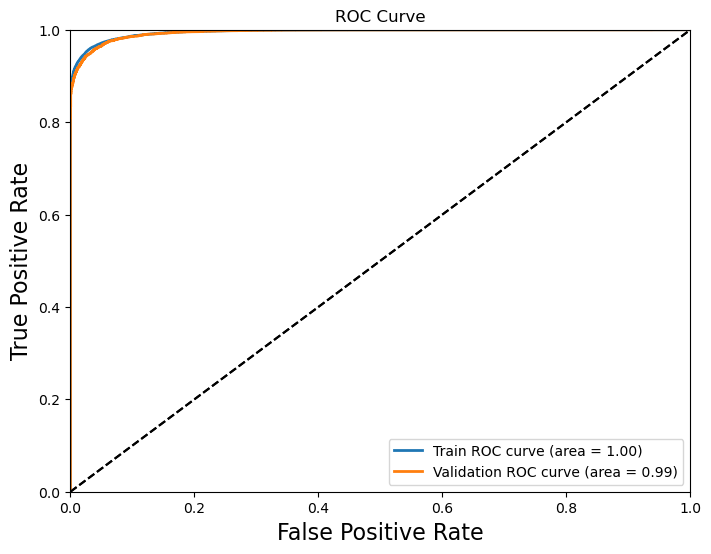

In [62]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# 훈련 데이터에 대한 ROC 커브
y_train_prob_improved = improved_model_l2.predict_proba(X_train_resampled)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_prob_improved)
roc_auc_train = auc(fpr_train, tpr_train)

# 검증 데이터에 대한 ROC 커브
y_val_prob_improved = improved_model_l2.predict_proba(X_val_scaled)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob_improved)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train, tpr_train, "Train ROC curve (area = {:.2f})".format(roc_auc_train))
plot_roc_curve(fpr_val, tpr_val, "Validation ROC curve (area = {:.2f})".format(roc_auc_val))
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.show()


In [63]:
# elasticnet 정규화 적용
improved_model_elasticnet = LogisticRegression(C=0.001, penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
improved_model_elasticnet.fit(X_train_resampled, y_train_resampled)

# 훈련 데이터에 대한 예측 및 성능 평가
y_train_pred_improved = improved_model_elasticnet.predict(X_train_resampled)
train_accuracy_elasticnet = accuracy_score(y_train_resampled, y_train_pred_improved)
print("Train Accuracy: {:.3f}".format(train_accuracy_elasticnet))
print("Train Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_improved))

# 검증 데이터에 대한 예측 및 성능 평가
y_val_pred_improved = improved_model_elasticnet.predict(X_val_scaled)
val_accuracy_elasticnet = accuracy_score(y_val, y_val_pred_improved)
print("\nValidation Accuracy: {:.3f}".format(val_accuracy_elasticnet))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred_improved))

Train Accuracy: 0.967
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39740
           1       0.99      0.95      0.97     39740

    accuracy                           0.97     79480
   macro avg       0.97      0.97      0.97     79480
weighted avg       0.97      0.97      0.97     79480


Validation Accuracy: 0.954
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4440
           1       0.99      0.95      0.97     13247

    accuracy                           0.95     17687
   macro avg       0.93      0.96      0.94     17687
weighted avg       0.96      0.95      0.96     17687



In [64]:
# 스케일링된 시험 데이터로 예측
y_test_pred_improved = improved_model_elasticnet.predict(X_test_scaled)

# 성능 평가
print("\nTest Accuracy: {:.3f}".format(accuracy_score(y_test, y_test_pred_improved)))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_improved))



Test Accuracy: 0.959
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      4441
           1       1.00      0.95      0.97     13247

    accuracy                           0.96     17688
   macro avg       0.93      0.97      0.95     17688
weighted avg       0.96      0.96      0.96     17688



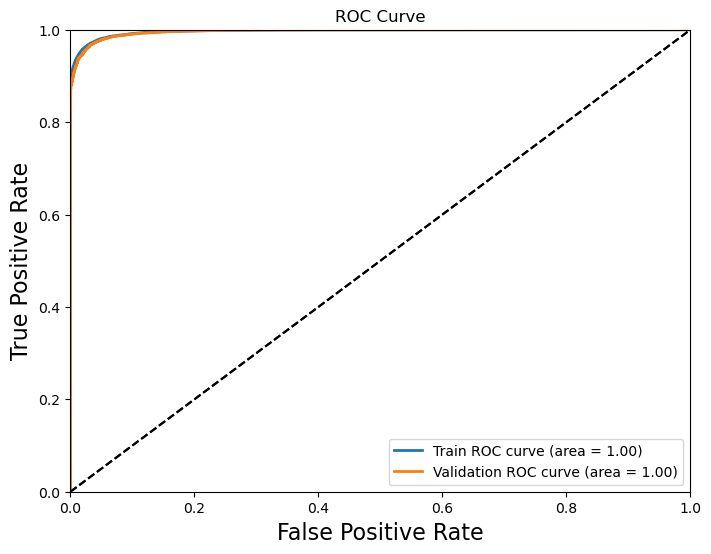

In [65]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# 훈련 데이터에 대한 ROC 커브
y_train_prob_improved = improved_model_elasticnet.predict_proba(X_train_resampled)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_prob_improved)
roc_auc_train = auc(fpr_train, tpr_train)

# 검증 데이터에 대한 ROC 커브
y_val_prob_improved = improved_model_elasticnet.predict_proba(X_val_scaled)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob_improved)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train, tpr_train, "Train ROC curve (area = {:.2f})".format(roc_auc_train))
plot_roc_curve(fpr_val, tpr_val, "Validation ROC curve (area = {:.2f})".format(roc_auc_val))
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.show()


In [66]:
new_customers_df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
11,1,0.000000,0.000000,0.000000,0.0,2,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,43.000000
21,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,113.000000
35,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,77.000000
50,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,63.000000
68,0,1.333333,213487.500000,0.666667,3259.5,3,1.750000,6250.000000,456.951921,0.888889,4.390025e+06,7.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
96205,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,120.000000
96242,0,0.750000,204793.000000,0.500000,5308.0,4,2.000000,5000.000000,177.813802,0.960000,5.056764e+06,16.500000
96245,1,0.500000,105107.000000,0.000000,0.0,2,4.000000,10000.000000,1448.203703,0.222679,1.036866e+06,35.000000
96249,1,0.000000,0.000000,0.000000,0.0,1,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1.000000


In [67]:
df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


In [68]:
new_customers_df2 = new_customers_df.copy()
new_customers_df2

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
11,1,0.000000,0.000000,0.000000,0.0,2,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,43.000000
21,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,113.000000
35,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,77.000000
50,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,63.000000
68,0,1.333333,213487.500000,0.666667,3259.5,3,1.750000,6250.000000,456.951921,0.888889,4.390025e+06,7.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
96205,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,120.000000
96242,0,0.750000,204793.000000,0.500000,5308.0,4,2.000000,5000.000000,177.813802,0.960000,5.056764e+06,16.500000
96245,1,0.500000,105107.000000,0.000000,0.0,2,4.000000,10000.000000,1448.203703,0.222679,1.036866e+06,35.000000
96249,1,0.000000,0.000000,0.000000,0.0,1,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1.000000


In [69]:
new_customers_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 11 to 96271
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 7842 non-null   int64  
 1   month_tr              7842 non-null   float64
 2   average_price         7842 non-null   float64
 3   promo_count           7842 non-null   float64
 4   average_promo_amount  7842 non-null   float64
 5   join_period           7842 non-null   int64  
 6   delivery_period       7842 non-null   float64
 7   average_shipment_fee  7842 non-null   float64
 8   average_distance      7842 non-null   float64
 9   churn_risk_index      7842 non-null   float64
 10  price_per_year        7842 non-null   float64
 11  mean_access_period    7842 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 796.5 KB


In [70]:
# 1. 원-핫 인코딩
# new_customers_encoded = pd.get_dummies(new_customers_df2.drop(['churn'], axis=1), 
#                                        columns=['gender'], 
#                                        drop_first=True)
new_customers_encoded = new_customers_df2
# 인덱스를 재설정하여 나중에 데이터 복사 시 문제가 발생하지 않도록 함
new_customers_encoded.reset_index(drop=True, inplace=True)

# 2. 컬럼 일치화
new_customers_aligned = pd.DataFrame(columns=X_train.columns, 
                                     data=np.zeros(shape=(new_customers_encoded.shape[0], X_train.columns.shape[0])))

for col in X_train.columns:
    if col in new_customers_encoded.columns:
        new_customers_aligned[col] = new_customers_encoded[col]
    else:
        new_customers_aligned[col] = 0  # 해당 컬럼이 new_customers_encoded에 없으면 0으로 채움

# 3. 데이터 스케일링
new_customers_scaled = scaler.transform(new_customers_aligned)

# 4. 예측
new_customers_predictions = improved_model_elasticnet.predict(new_customers_scaled)

# 5. 결과 확인
new_customers_df2["predicted_churn"] = new_customers_predictions
print(new_customers_df2[["churn", "predicted_churn"]])


      churn  predicted_churn
0         1                1
1         1                1
2         1                1
3         1                1
4         0                0
...     ...              ...
7837      1                1
7838      0                0
7839      1                0
7840      1                1
7841      0                0

[7842 rows x 2 columns]


In [71]:
new_customers_df2['churn'].value_counts()

1    5844
0    1998
Name: churn, dtype: int64

In [72]:
new_customers_df2['predicted_churn'].value_counts()


1    5087
0    2755
Name: predicted_churn, dtype: int64

In [73]:
true_labels = new_customers_df2['churn']
predicted_labels = new_customers_df2['predicted_churn']

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Model Accuracy: {accuracy * 100:.2f}%") # 정확도. 
print(f"Precision: {precision * 100:.2f}%") # 정밀도. 모델이 이탈로 예측한 고객 중 실제 이탈률
print(f"Recall: {recall * 100:.2f}%") # 재현율. 실제 이탈 고객을 모델이 이탈이라고 예측한 비율
print(f"F1 Score: {f1 * 100:.2f}%") # 정밀도와 재현율의 조화 평균. 두 지표 사의 균형 평가



Model Accuracy: 90.35%
Precision: 100.00%
Recall: 87.05%
F1 Score: 93.07%


# 랜덤 포레스트 모델 사용

In [74]:
df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88436 entries, 0 to 88435
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 88436 non-null  int64  
 1   month_tr              88436 non-null  float64
 2   average_price         88436 non-null  float64
 3   promo_count           88436 non-null  float64
 4   average_promo_amount  88436 non-null  float64
 5   join_period           88436 non-null  int64  
 6   delivery_period       88436 non-null  float64
 7   average_shipment_fee  88436 non-null  float64
 8   average_distance      88436 non-null  float64
 9   churn_risk_index      88436 non-null  float64
 10  price_per_year        88436 non-null  float64
 11  mean_access_period    88436 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 8.1 MB


In [76]:
ramdom_df = df.copy()
ramdom_df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


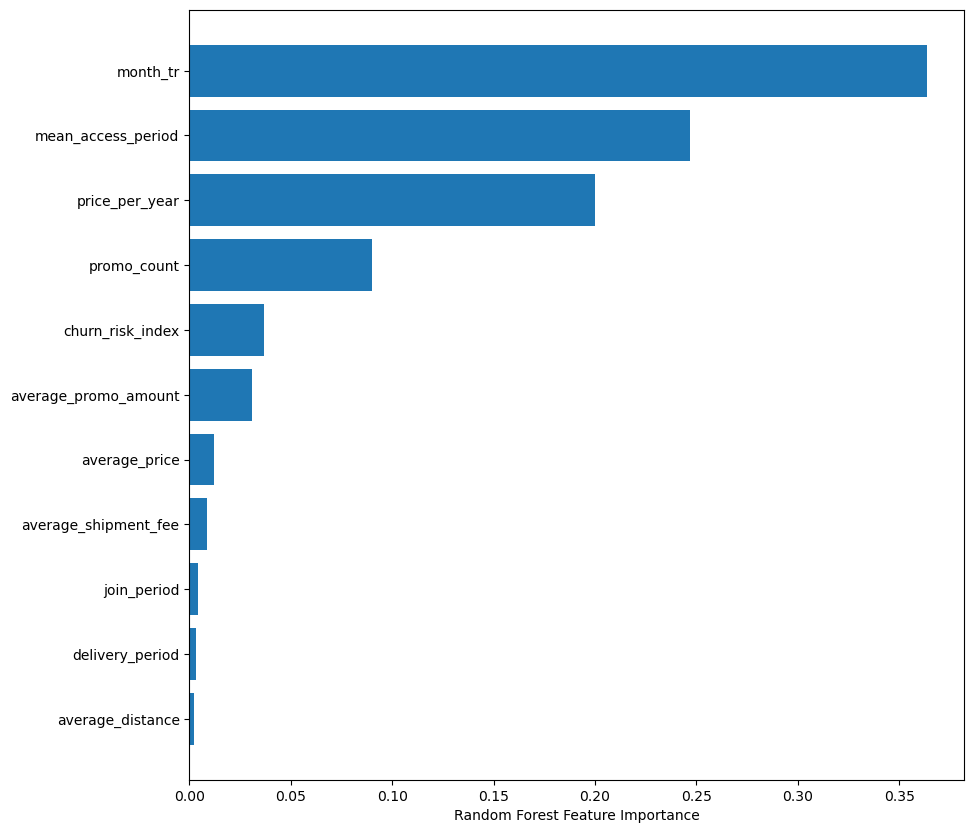

In [77]:

# 원-핫 인코딩 적용
#categorical_features = ['gender']
#ramdom_df_encoded = pd.get_dummies(ramdom_df, columns=categorical_features, drop_first=True)
ramdom_df_encoded = df.copy()
# train-test split
X = ramdom_df_encoded.drop(columns=['churn'])
y = ramdom_df_encoded['churn']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# 랜덤 포레스트 모델 학습
base_clf = RandomForestClassifier()
base_clf.fit(X_train, y_train)

# 특성 중요도 확인
importances = base_clf.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 10))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()


In [78]:
# 예측값 생성
y_train_pred = base_clf.predict(X_train)
y_val_pred = base_clf.predict(X_val)

# 성능 지표 출력 함수
def print_metrics(y_true, y_pred, label):
    print(f"Metrics for {label}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print("-----------------------------")

print("베이스 모델")
print_metrics(y_train, y_train_pred, "Training")
print_metrics(y_val, y_val_pred, "Validation")

# 과적합 의심됨

베이스 모델
Metrics for Training:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
-----------------------------
Metrics for Validation:
Accuracy: 0.9968
Precision: 0.9974
Recall: 0.9983
F1-Score: 0.9978
ROC-AUC: 0.9953
-----------------------------


In [79]:
# 시험 데이터
y_test_pred = base_clf.predict(X_test)

print_metrics(y_test, y_test_pred, "test")

Metrics for test:
Accuracy: 0.9964
Precision: 0.9965
Recall: 0.9988
F1-Score: 0.9976
ROC-AUC: 0.9940
-----------------------------


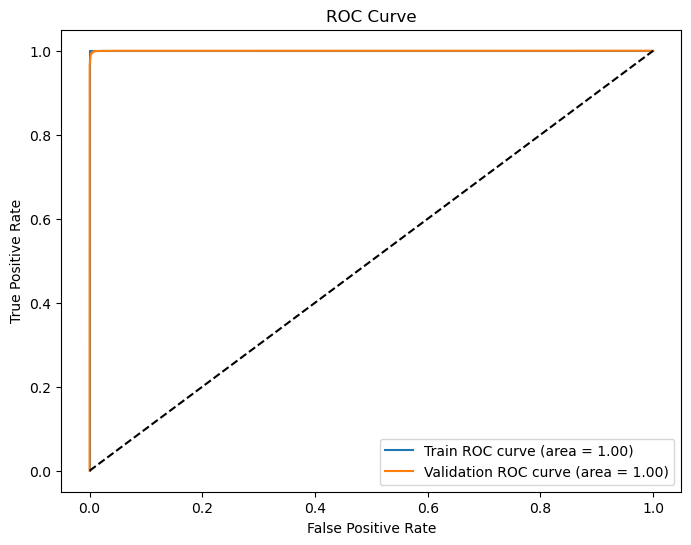

In [80]:
# 훈련 데이터에 대한 예측 확률
y_train_prob = base_clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# 검증 데이터에 대한 예측 확률
y_val_prob = base_clf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# 랜덤 포레스트 모델 개선

In [81]:
# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

# 오버샘플링
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [82]:
# SMOTE 적용 전 데이터 분포
print("Before SMOTE:")
print(y_train.value_counts(normalize=True)) # normalize=True를 통해 비율로 출력

# SMOTE 적용 후 데이터 분포
print("\nAfter SMOTE:")
print(y_resampled.value_counts(normalize=True))


Before SMOTE:
1    0.747498
0    0.252502
Name: churn, dtype: float64

After SMOTE:
1    0.5
0    0.5
Name: churn, dtype: float64


In [83]:
# Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

In [84]:
# 최적의 파라미터로 랜덤 포레스트 모델 생성
optimized_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=42
)

# 모델 학습
optimized_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [85]:

# 성능 지표 출력 함수
def print_metrics(y_true, y_pred, label):
    print(f"Metrics for {label}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.3f}")
    print("-----------------------------")

# 훈련 데이터 예측
y_train_pred = optimized_rf.predict(X_resampled)

# 검증 데이터 예측
y_val_pred = optimized_rf.predict(X_val)

# 각 데이터 세트별 성능 출력
print_metrics(y_resampled, y_train_pred, "Training (with SMOTE)")
print_metrics(y_val, y_val_pred, "Validation")
# 과적합이 의심됨

Metrics for Training (with SMOTE):
Accuracy: 0.999
Precision: 0.999
Recall: 0.999
F1-Score: 0.999
ROC-AUC: 0.999
-----------------------------
Metrics for Validation:
Accuracy: 0.996
Precision: 0.998
Recall: 0.997
F1-Score: 0.998
ROC-AUC: 0.996
-----------------------------


In [86]:
# 시험 데이터 예측
y_test_pred = optimized_rf.predict(X_test)
print_metrics(y_test, y_test_pred, "Test")

Metrics for Test:
Accuracy: 0.997
Precision: 0.998
Recall: 0.998
F1-Score: 0.998
ROC-AUC: 0.995
-----------------------------


In [87]:
# 과적합 해결
# max_depth: 트리의 깊이를 제한합니다. 현재 설정된 깊이보다 더 낮은 깊이로 제한할 수 있습니다.
# min_samples_split: 노드에서 분할을 시도하기 전에 필요한 최소 샘플 수를 증가시킵니다.
# min_samples_leaf: 리프 노드가 되기 위해 필요한 최소 샘플 수를 증가시킵니다.
# max_features: 각 분할에 사용되는 특성의 최대 수를 줄입니다.

In [88]:
'''
# 새로운 파라미터 그리드 설정. 과적합 해결을 위함
new_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],  # 깊이 제한
    'min_samples_split': [10, 15, 20],  # 증가된 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [2, 4, 6],  # 증가된 리프 노드에 필요한 최소 샘플 수
    'max_features': ['sqrt']  # 특성의 최대 수 줄임
}

# 그리드 서치 객체 생성
new_grid_search = GridSearchCV(estimator=optimized_rf, param_grid=new_param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 그리드 서치 실행
new_grid_search.fit(X_resampled, y_resampled)

# 최적의 파라미터와 성능 출력
print("Best parameters found: ", new_grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(new_grid_search.best_score_))
'''

'\n# 새로운 파라미터 그리드 설정. 과적합 해결을 위함\nnew_param_grid = {\n    \'n_estimators\': [50, 100],\n    \'max_depth\': [10, 20],  # 깊이 제한\n    \'min_samples_split\': [10, 15, 20],  # 증가된 분할에 필요한 최소 샘플 수\n    \'min_samples_leaf\': [2, 4, 6],  # 증가된 리프 노드에 필요한 최소 샘플 수\n    \'max_features\': [\'sqrt\']  # 특성의 최대 수 줄임\n}\n\n# 그리드 서치 객체 생성\nnew_grid_search = GridSearchCV(estimator=optimized_rf, param_grid=new_param_grid, \n                               cv=3, n_jobs=-1, verbose=2, scoring=\'accuracy\')\n\n# 그리드 서치 실행\nnew_grid_search.fit(X_resampled, y_resampled)\n\n# 최적의 파라미터와 성능 출력\nprint("Best parameters found: ", new_grid_search.best_params_)\nprint("Best cross-validation score: {:.2f}".format(new_grid_search.best_score_))\n'

In [89]:
# Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
# Best cross-validation score: 1.00

In [90]:
# 최적의 파라미터로 개선된 랜덤 포레스트 모델 생성
improved_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

# 모델 학습
improved_rf.fit(X_resampled, y_resampled)

# 훈련 데이터 예측
y_train_pred_improved = improved_rf.predict(X_resampled)

# 검증 데이터 예측
y_val_pred_improved = improved_rf.predict(X_val)

# 훈련, 검증 데이터 세트별 성능 출력
print_metrics(y_resampled, y_train_pred_improved, "Training (with SMOTE)")
print_metrics(y_val, y_val_pred_improved, "Validation")


Metrics for Training (with SMOTE):
Accuracy: 0.999
Precision: 0.999
Recall: 0.999
F1-Score: 0.999
ROC-AUC: 0.999
-----------------------------
Metrics for Validation:
Accuracy: 0.996
Precision: 0.998
Recall: 0.997
F1-Score: 0.997
ROC-AUC: 0.995
-----------------------------


In [91]:
# 임의로 파라미터 조정을 통해 과적합 해결하고자 함

In [92]:
# 더 단순한 모델을 위한 파라미터 조정
simpler_rf = RandomForestClassifier(
    n_estimators=50,  # 트리 수 줄임
    max_depth=10,     # 최대 깊이 줄임
    max_features='sqrt',
    min_samples_leaf=5,    # 최소 리프 노드 샘플 수 증가
    min_samples_split=15,  # 노드를 분할하기 위한 최소 샘플 수 증가
    random_state=42
)

# 모델 학습
simpler_rf.fit(X_resampled, y_resampled)

# 훈련 데이터 예측
y_train_pred_simpler = simpler_rf.predict(X_resampled)

# 검증 데이터 예측
y_val_pred_simpler = simpler_rf.predict(X_val)

# 훈련, 검증 데이터 세트별 성능 출력
print_metrics(y_resampled, y_train_pred_simpler, "Training (with SMOTE)")
print_metrics(y_val, y_val_pred_simpler, "Validation")


Metrics for Training (with SMOTE):
Accuracy: 0.997
Precision: 0.998
Recall: 0.997
F1-Score: 0.997
ROC-AUC: 0.997
-----------------------------
Metrics for Validation:
Accuracy: 0.995
Precision: 0.998
Recall: 0.996
F1-Score: 0.997
ROC-AUC: 0.995
-----------------------------


In [93]:
# 더 단순한 모델을 위한 파라미터 조정
simpler_rf = RandomForestClassifier(
    n_estimators=50,  # 트리 수 줄임
    max_depth=2,     # 최대 깊이 줄임
    max_features='sqrt',
    min_samples_leaf=70,    # 최소 리프 노드 샘플 수 증가
    min_samples_split=30,  # 노드를 분할하기 위한 최소 샘플 수 증가
    random_state=42
)

# 모델 학습
simpler_rf.fit(X_resampled, y_resampled)

# 훈련 데이터 예측
y_train_pred_simpler = simpler_rf.predict(X_resampled)

# 검증 데이터 예측
y_val_pred_simpler = simpler_rf.predict(X_val)

# 훈련, 검증 데이터 세트별 성능 출력
print_metrics(y_resampled, y_train_pred_simpler, "Training (with SMOTE)")
print_metrics(y_val, y_val_pred_simpler, "Validation")


Metrics for Training (with SMOTE):
Accuracy: 0.988
Precision: 0.989
Recall: 0.986
F1-Score: 0.988
ROC-AUC: 0.988
-----------------------------
Metrics for Validation:
Accuracy: 0.986
Precision: 0.996
Recall: 0.986
F1-Score: 0.991
ROC-AUC: 0.987
-----------------------------


In [94]:

# 테스트 데이터 예측
y_test_pred_simpler = simpler_rf.predict(X_test)

# 테스트 데이터에 대한 성능 평가
print_metrics(y_test, y_test_pred_simpler, "Test")


Metrics for Test:
Accuracy: 0.986
Precision: 0.995
Recall: 0.987
F1-Score: 0.991
ROC-AUC: 0.986
-----------------------------


In [95]:
'''
트리의 최대 깊이 줄이기 (max_depth): 트리의 깊이를 제한하면 모델이 데이터의 미세한 변동성에 대응하려는 경향이 줄어들게 됩니다. 깊이가 너무 깊어진 트리는 학습 데이터의 노이즈까지 학습하게 될 수 있어, 깊이를 제한함으로써 이를 방지할 수 있습니다.

리프 노드의 최소 샘플 수 늘리기 (min_samples_leaf): 리프 노드에 더 많은 샘플이 필요하도록 설정하면, 트리가 너무 세부적으로 분기하는 것을 방지할 수 있습니다.

노드 분할의 최소 샘플 수 늘리기 (min_samples_split): 노드를 분할하기 위해 필요한 샘플 수를 늘리면, 트리는 데이터의 작은 변동에는 반응하지 않게 됩니다.

이외에도 랜덤 포레스트의 특성 상, 사용하는 트리의 수 (n_estimators)를 줄이는 것도 모델을 단순화하는데 도움이 될 수 있습니다.

랜덤 포레스트와 같은 앙상블 모델은 복잡한 구조를 가질 수 있기 때문에, 위와 같은 하이퍼파라미터 조정은 과적합을 방지하는데 중요한 역할을 합니다.






'''

'\n트리의 최대 깊이 줄이기 (max_depth): 트리의 깊이를 제한하면 모델이 데이터의 미세한 변동성에 대응하려는 경향이 줄어들게 됩니다. 깊이가 너무 깊어진 트리는 학습 데이터의 노이즈까지 학습하게 될 수 있어, 깊이를 제한함으로써 이를 방지할 수 있습니다.\n\n리프 노드의 최소 샘플 수 늘리기 (min_samples_leaf): 리프 노드에 더 많은 샘플이 필요하도록 설정하면, 트리가 너무 세부적으로 분기하는 것을 방지할 수 있습니다.\n\n노드 분할의 최소 샘플 수 늘리기 (min_samples_split): 노드를 분할하기 위해 필요한 샘플 수를 늘리면, 트리는 데이터의 작은 변동에는 반응하지 않게 됩니다.\n\n이외에도 랜덤 포레스트의 특성 상, 사용하는 트리의 수 (n_estimators)를 줄이는 것도 모델을 단순화하는데 도움이 될 수 있습니다.\n\n랜덤 포레스트와 같은 앙상블 모델은 복잡한 구조를 가질 수 있기 때문에, 위와 같은 하이퍼파라미터 조정은 과적합을 방지하는데 중요한 역할을 합니다.\n\n\n\n\n\n\n'

In [96]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79326 entries, 0 to 79325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month_tr              79326 non-null  float64
 1   average_price         79326 non-null  float64
 2   promo_count           79326 non-null  float64
 3   average_promo_amount  79326 non-null  float64
 4   join_period           79326 non-null  int64  
 5   delivery_period       79326 non-null  float64
 6   average_shipment_fee  79326 non-null  float64
 7   average_distance      79326 non-null  float64
 8   churn_risk_index      79326 non-null  float64
 9   price_per_year        79326 non-null  float64
 10  mean_access_period    79326 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 6.7 MB


In [97]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17687 entries, 21410 to 16141
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month_tr              17687 non-null  float64
 1   average_price         17687 non-null  float64
 2   promo_count           17687 non-null  float64
 3   average_promo_amount  17687 non-null  float64
 4   join_period           17687 non-null  int64  
 5   delivery_period       17687 non-null  float64
 6   average_shipment_fee  17687 non-null  float64
 7   average_distance      17687 non-null  float64
 8   churn_risk_index      17687 non-null  float64
 9   price_per_year        17687 non-null  float64
 10  mean_access_period    17687 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


In [113]:
even_simpler_rf = RandomForestClassifier(
    n_estimators=20,       # 트리 수 
    max_depth=2,           # 최대 깊이 줄임
    max_features='sqrt',
    min_samples_leaf=200,  # 최소 리프 노드 샘플 수 증가
    min_samples_split=200, # 노드를 분할하기 위한 최소 샘플 수 증가
    random_state=42
)

# 모델 학습
even_simpler_rf.fit(X_resampled, y_resampled)

# 훈련 데이터 예측
y_train_pred_even_simpler = even_simpler_rf.predict(X_resampled)

# 검증 데이터 예측
y_val_pred_even_simpler = even_simpler_rf.predict(X_val)

# 훈련, 검증 데이터 세트별 성능 출력
print_metrics(y_resampled, y_train_pred_even_simpler, "Training (with SMOTE)")
print_metrics(y_val, y_val_pred_even_simpler, "Validation")


Metrics for Training (with SMOTE):
Accuracy: 0.981
Precision: 0.990
Recall: 0.971
F1-Score: 0.980
ROC-AUC: 0.981
-----------------------------
Metrics for Validation:
Accuracy: 0.976
Precision: 0.996
Recall: 0.971
F1-Score: 0.983
ROC-AUC: 0.980
-----------------------------


In [114]:
# 테스트 데이터 예측
y_test_pred_even_simpler = even_simpler_rf.predict(X_test)

# 테스트 데이터에 대한 성능 평가
print_metrics(y_test, y_test_pred_even_simpler, "Test")


Metrics for Test:
Accuracy: 0.974
Precision: 0.995
Recall: 0.970
F1-Score: 0.983
ROC-AUC: 0.978
-----------------------------


In [115]:
X_resampled.columns

Index(['month_tr', 'average_price', 'promo_count', 'average_promo_amount',
       'join_period', 'delivery_period', 'average_shipment_fee',
       'average_distance', 'churn_risk_index', 'price_per_year',
       'mean_access_period'],
      dtype='object')

In [116]:
# from sklearn.utils import all_estimators
# for name, Class in all_estimators():
#     if hasattr(Class, "plot_partial_dependence"):
#         print(name)


In [117]:
# from sklearn.inspection import plot_partial_dependence

# feature_name = "average_price"
# feature_index = X_resampled.columns.get_loc(feature_name)

# fig, ax = plt.subplots(figsize=(12, 6))
# plot_partial_dependence(even_simpler_rf, X_val, features=[feature_index], ax=ax, grid_resolution=20)
# plt.show()


In [118]:
# # 여기서 features는 PDP를 그릴 특성의 인덱스나 이름을 의미합니다.
# pdp, axes = partial_dependence(even_simpler_rf, X_val, features=[feature_index_or_name])

# display = PartialDependenceDisplay(pdp=pdp, feature_names=[feature_name], grid_resolution=grid_resolution, features=axes)
# display.plot()

In [104]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 랜덤 포레스트의 트리 중 일부를 선택하여 시각화합니다.
# 첫 3개의 트리 시각화
n_trees_to_plot = 3

for i in range(n_trees_to_plot):
    plt.figure(figsize=(20, 10))
    plot_tree(even_simpler_rf.estimators_[i], 
              filled=True, 
              feature_names=X_resampled.columns, 
              class_names=["Class 0", "Class 1"], 
              rounded=True, 
              proportion=True)
    plt.title(f"Tree {i}")
    plt.show()


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['month_tr', 'average_price', 'promo_count', 'average_promo_amount',
       'join_period', 'delivery_period', 'average_shipment_fee',
       'average_distance', 'churn_risk_index', 'price_per_year',
       'mean_access_period'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

In [119]:
# Tree Interpreter 사용

In [120]:
from treeinterpreter import treeinterpreter as ti

# 랜덤 포레스트 모델과 예측을 분석하려는 샘플을 사용하여 예측 분해를 수행합니다.
# 여기서는 검증 데이터셋의 첫 번째 샘플을 사용하였습니다.
prediction, bias, contributions = ti.predict(even_simpler_rf, X_val.iloc[0].values.reshape(1, -1))

# 결과 출력
print("Prediction:", prediction)
print("Bias (trainset mean):", bias)
print("Feature contributions:")
for c, feature in zip(contributions[0], X_resampled.columns):
    print(feature, c)


Prediction: [[0.95236831 0.04763169]]
Bias (trainset mean): [[0.50059186 0.49940814]]
Feature contributions:
month_tr [ 0.09485464 -0.09485464]
average_price [ 0.00067941 -0.00067941]
promo_count [ 0.04956971 -0.04956971]
average_promo_amount [ 0.06389956 -0.06389956]
join_period [0. 0.]
delivery_period [ 0.00171781 -0.00171781]
average_shipment_fee [ 0.01501655 -0.01501655]
average_distance [0. 0.]
churn_risk_index [ 0.0302562 -0.0302562]
price_per_year [ 0.14584472 -0.14584472]
mean_access_period [ 0.04993784 -0.04993784]


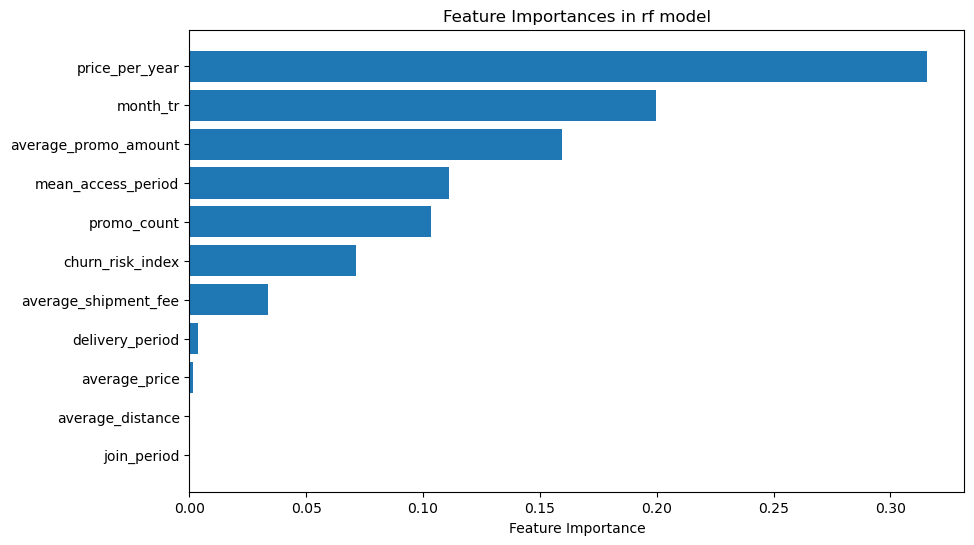

In [121]:
# 특성 중요도 가져오기
feature_importances = even_simpler_rf.feature_importances_

# 특성 중요도로 내림차순 정렬
sorted_idx = np.argsort(feature_importances)[::-1]

# 특성 이름 (변수명에 따라 변경 필요)
features = X_resampled.columns

# 중요도가 높은 순서대로 특성 이름 가져오기
sorted_features = [features[i] for i in sorted_idx]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances in rf model")
plt.gca().invert_yaxis()  # 상위 중요도 특성이 위에 오도록 y축 뒤집기
plt.show()

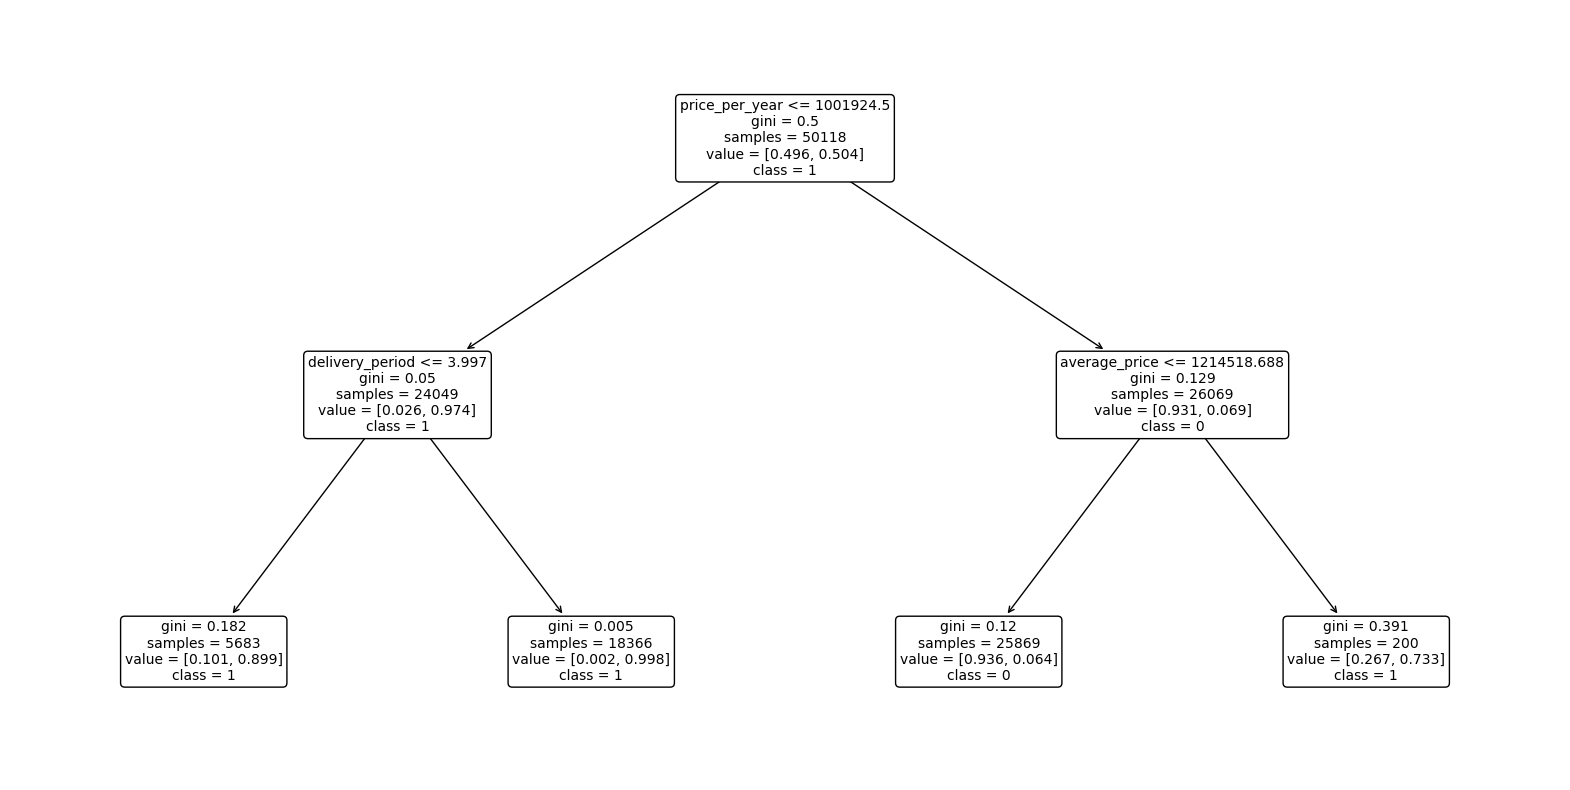

In [124]:
# 첫 번째 트리 선택
first_tree = even_simpler_rf.estimators_[0]

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=X_resampled.columns.tolist(), class_names=['0', '1'], rounded=True, fontsize=10)

plt.show()

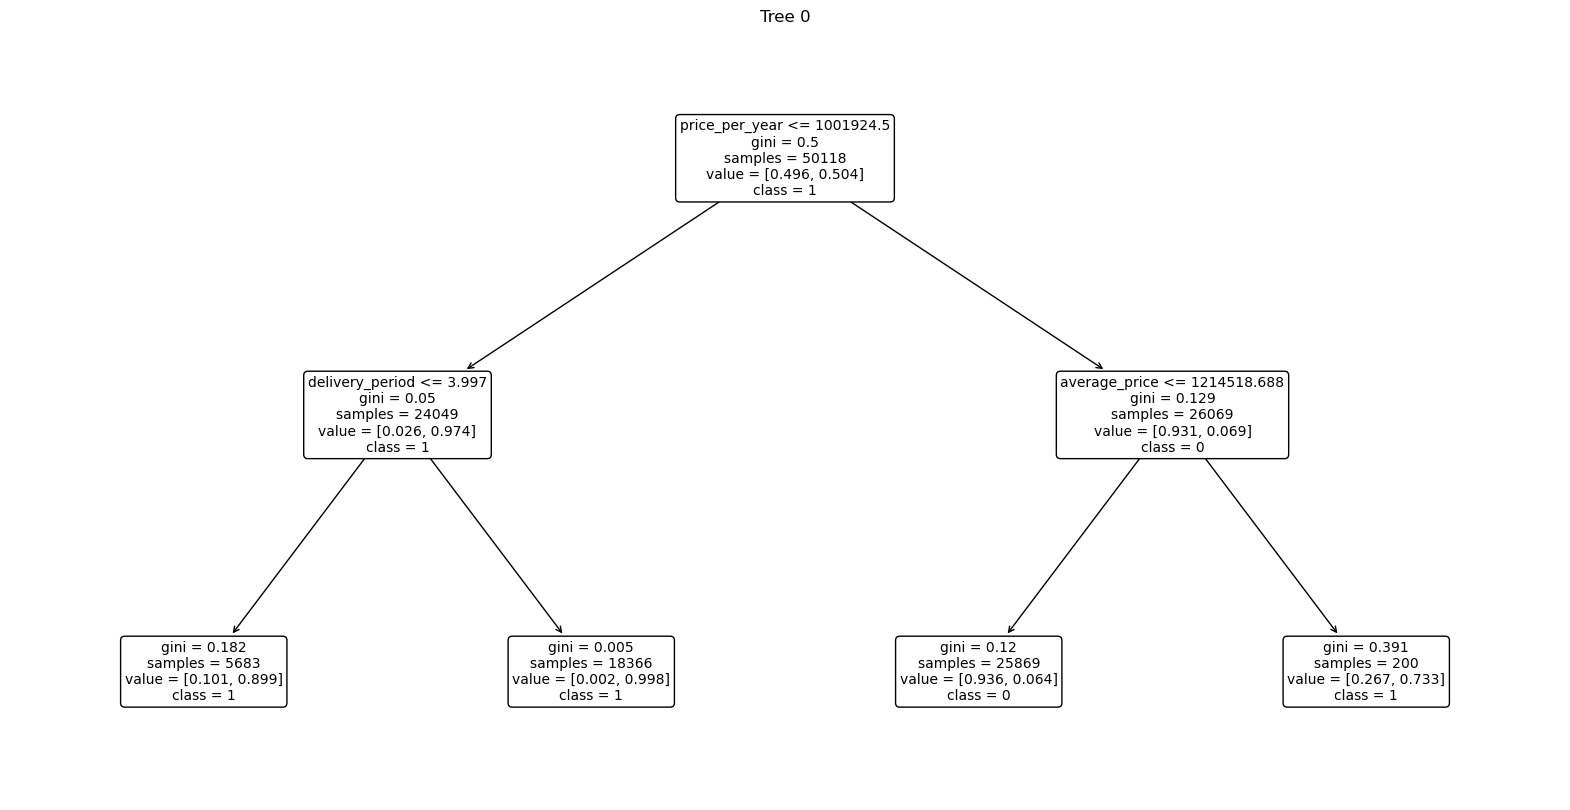

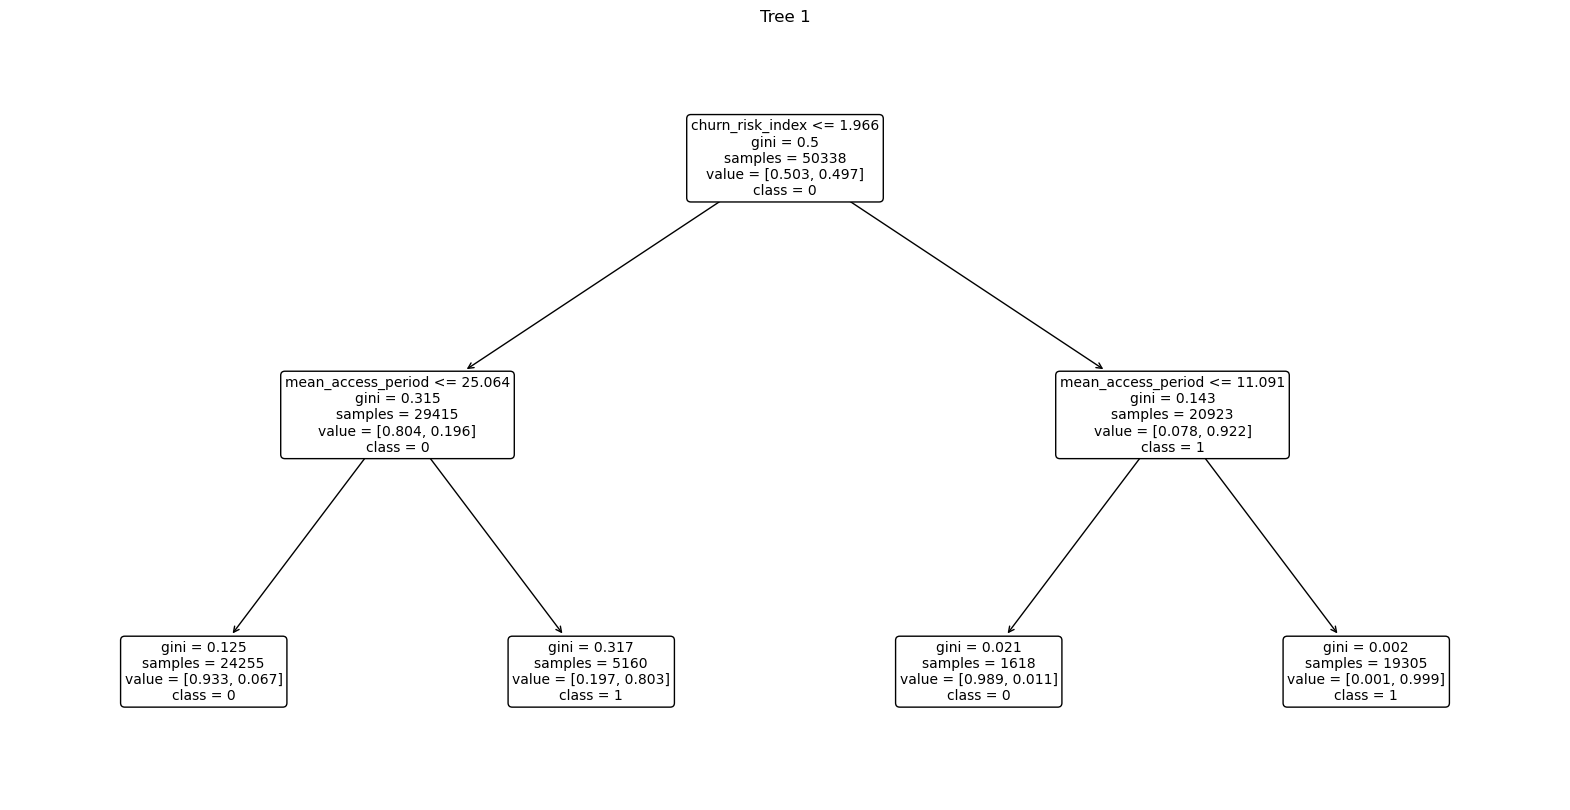

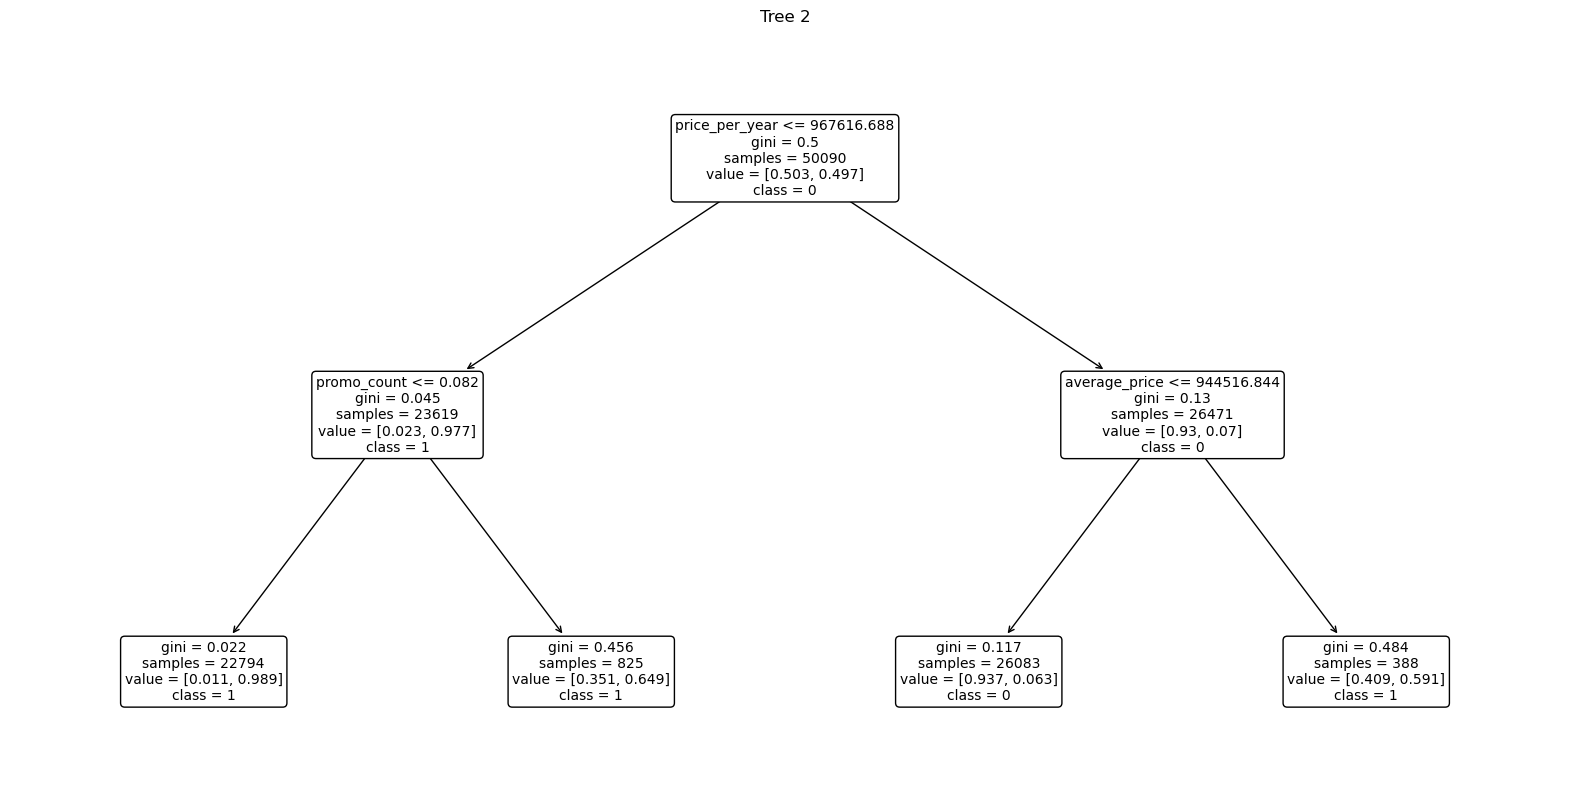

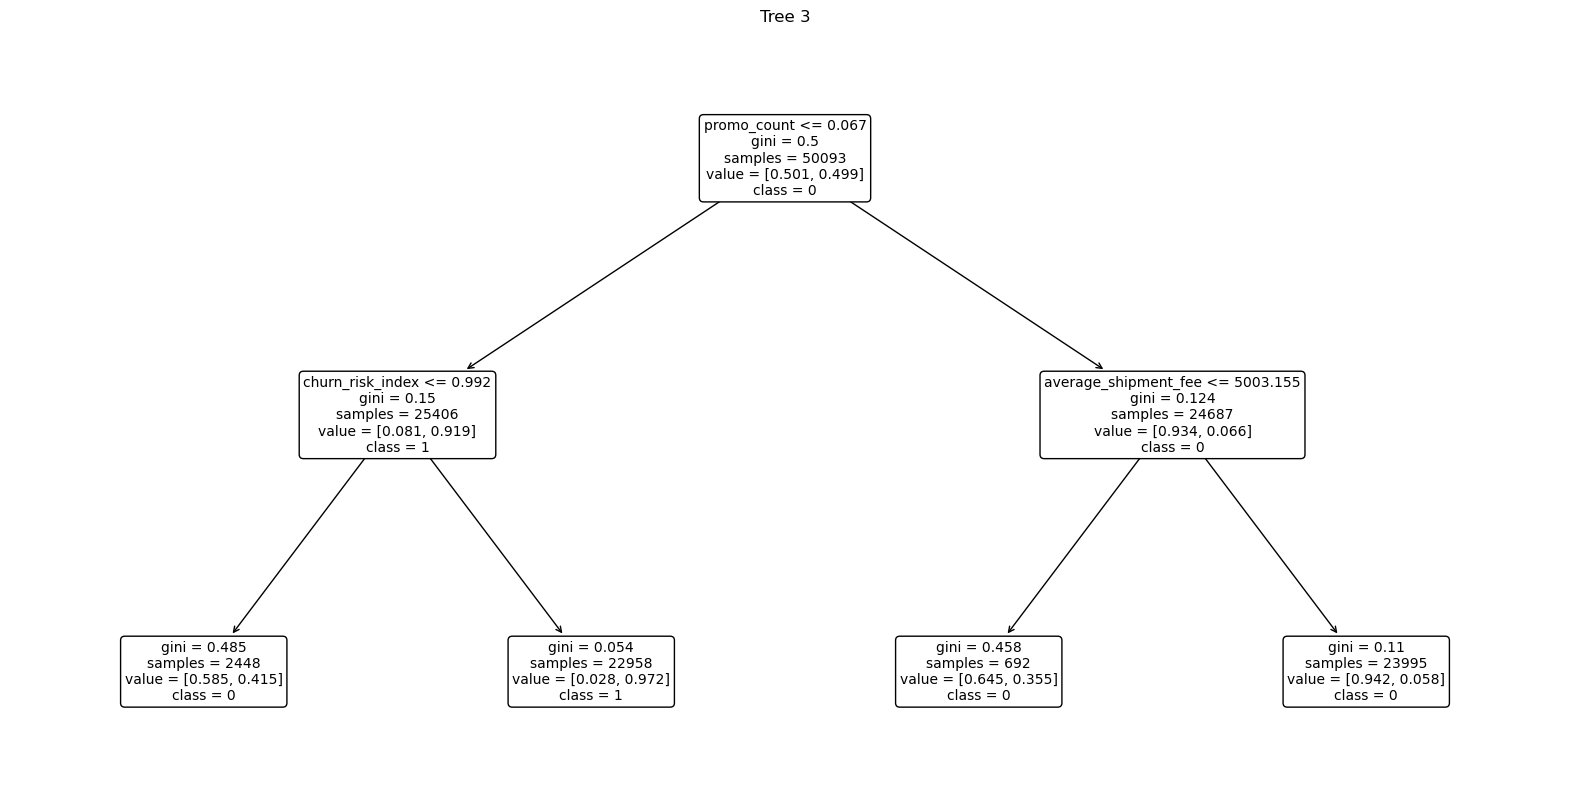

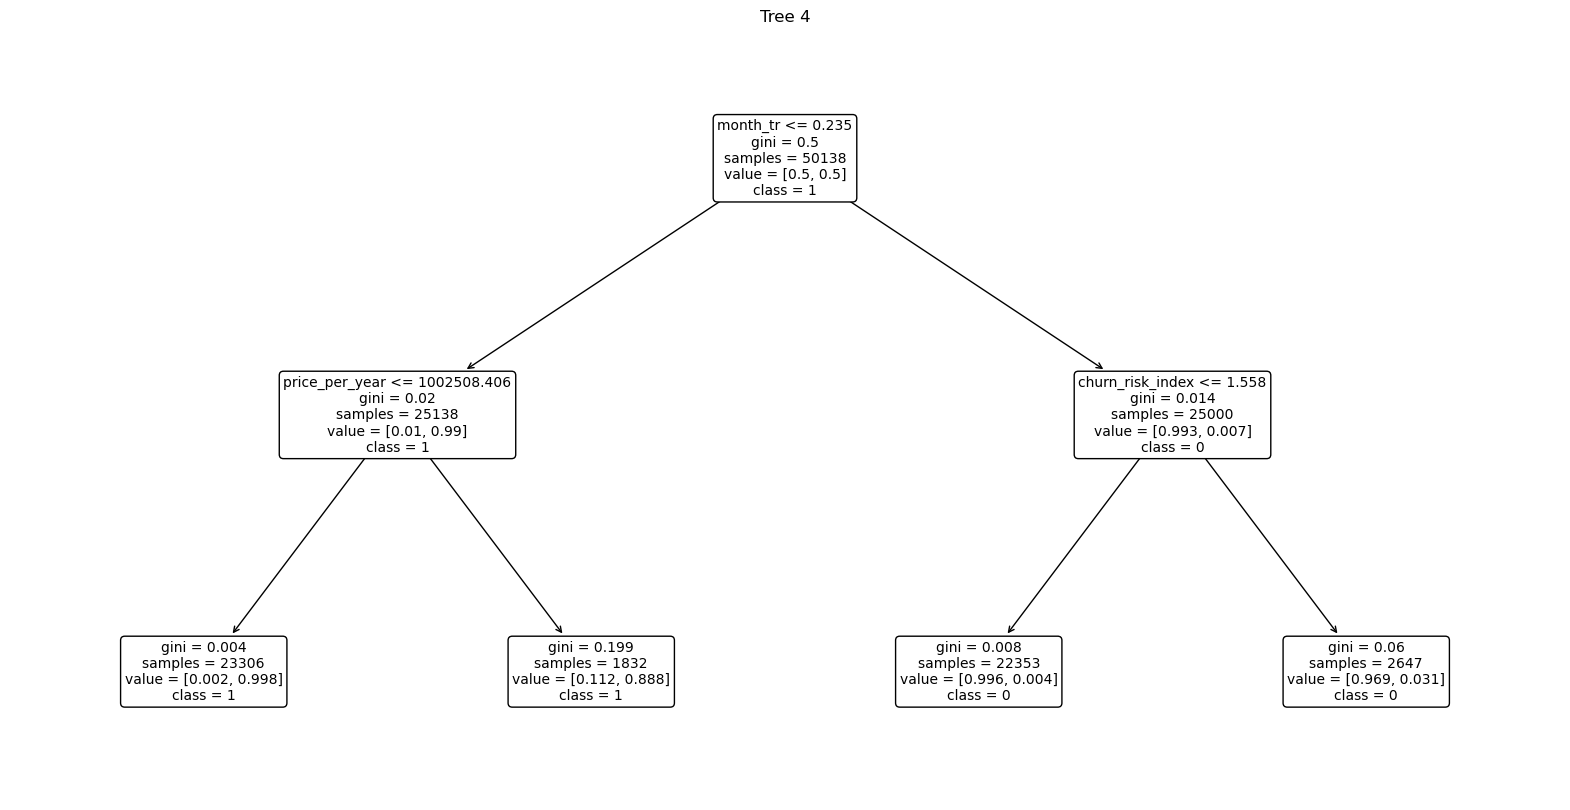

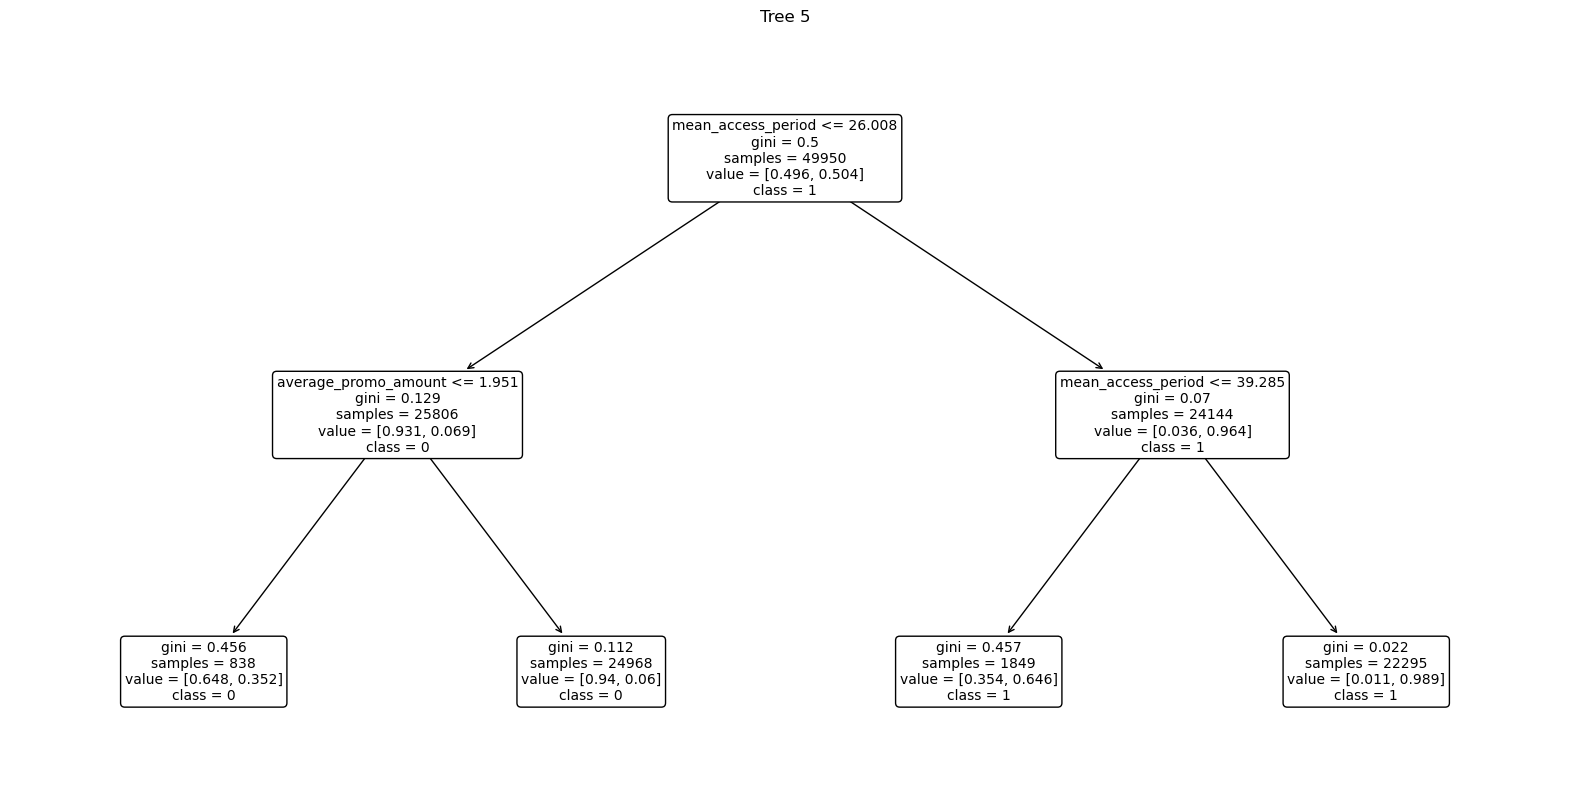

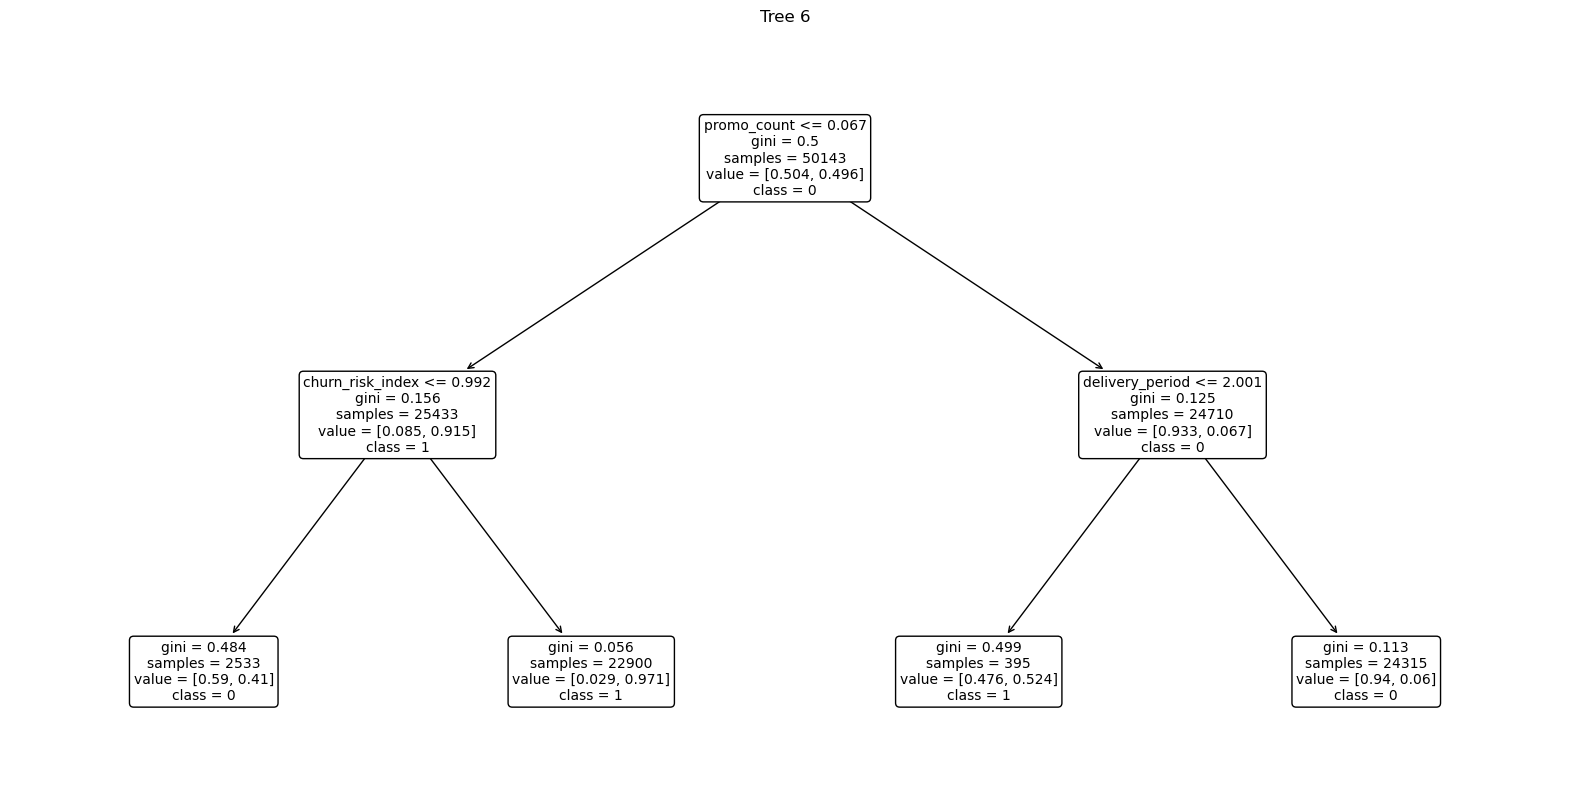

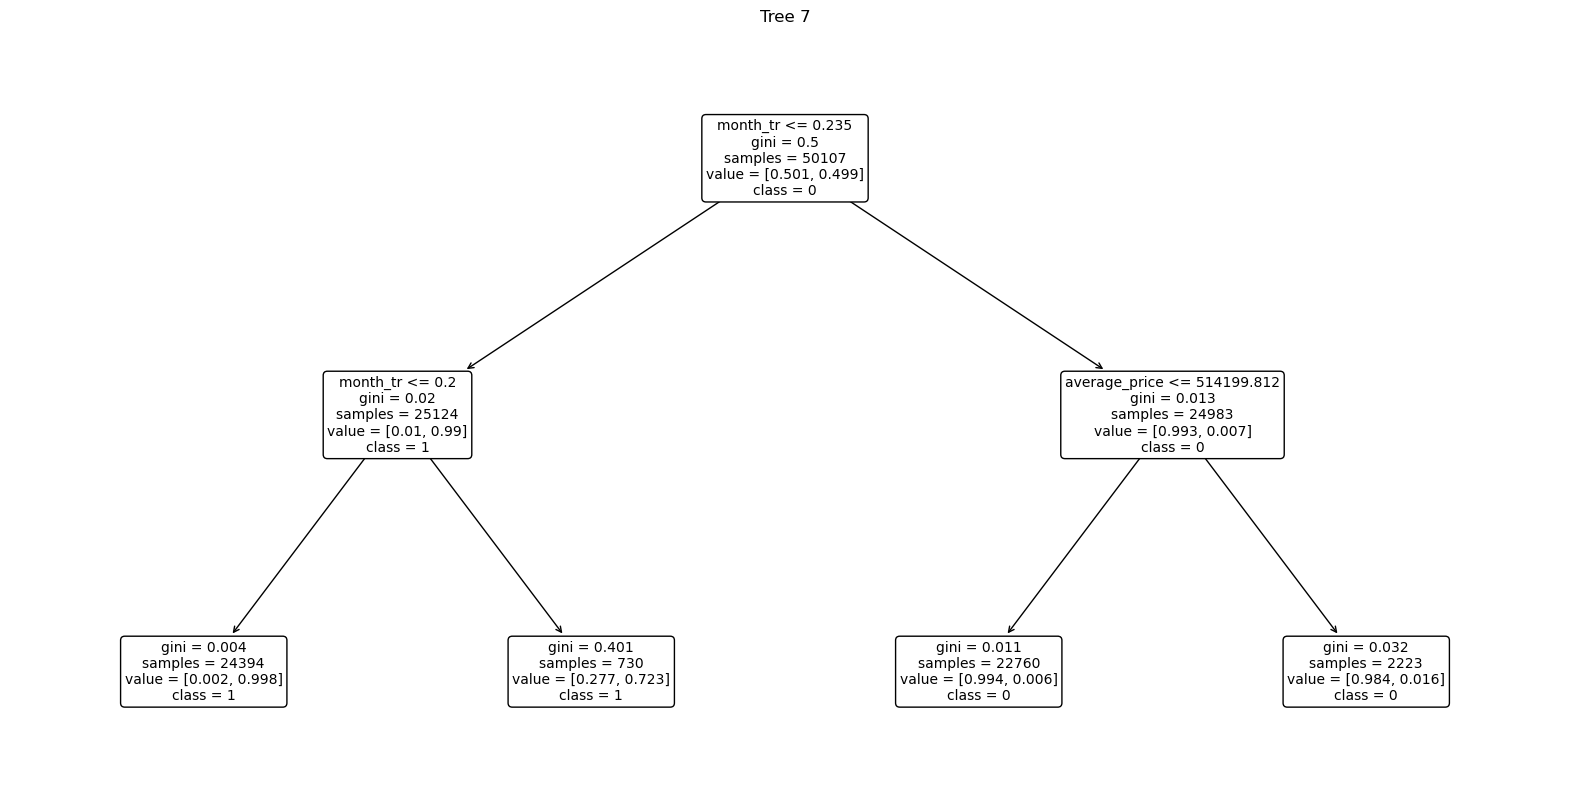

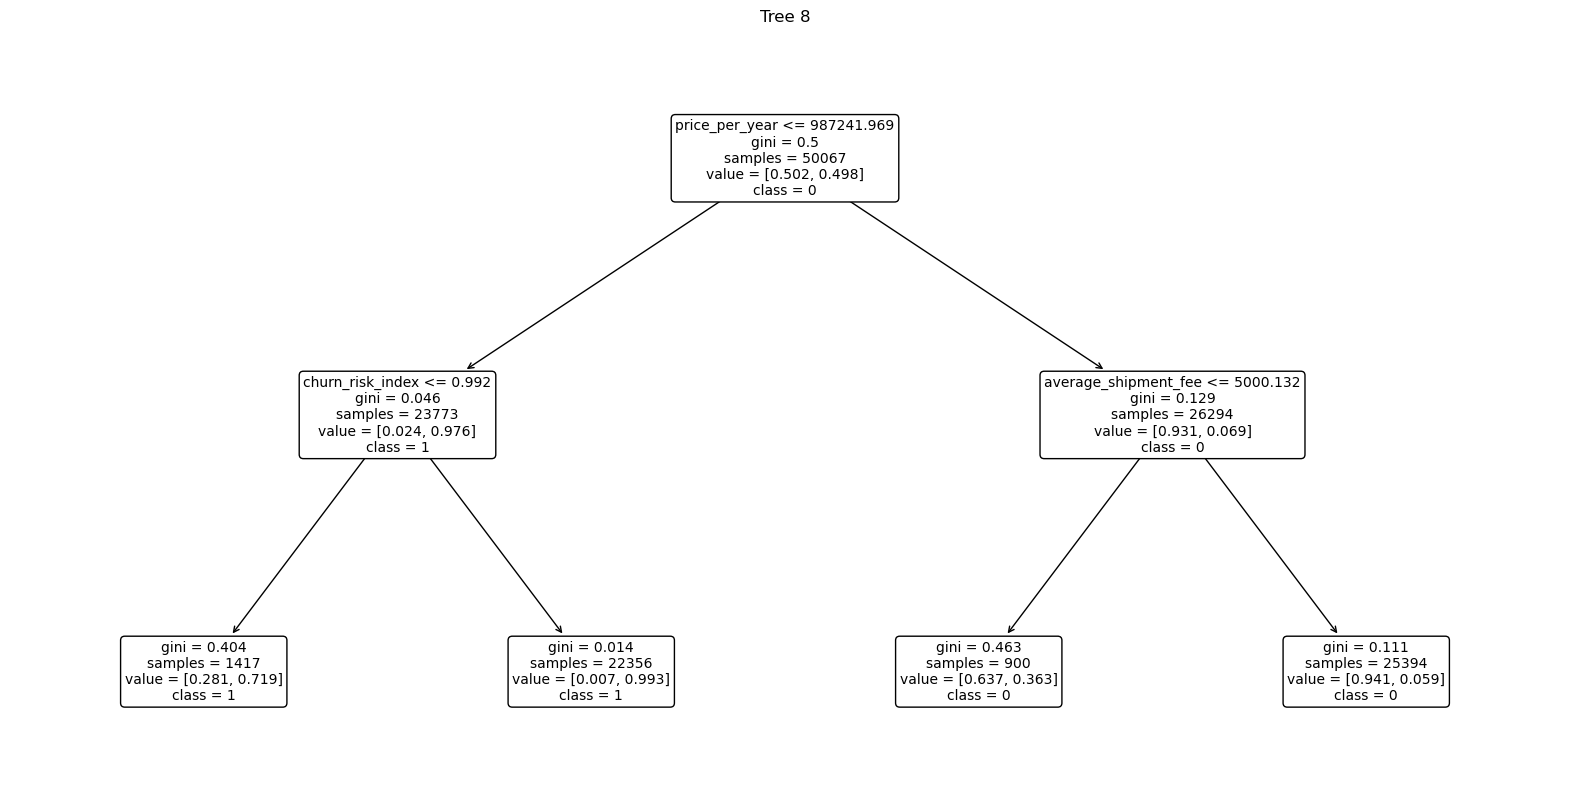

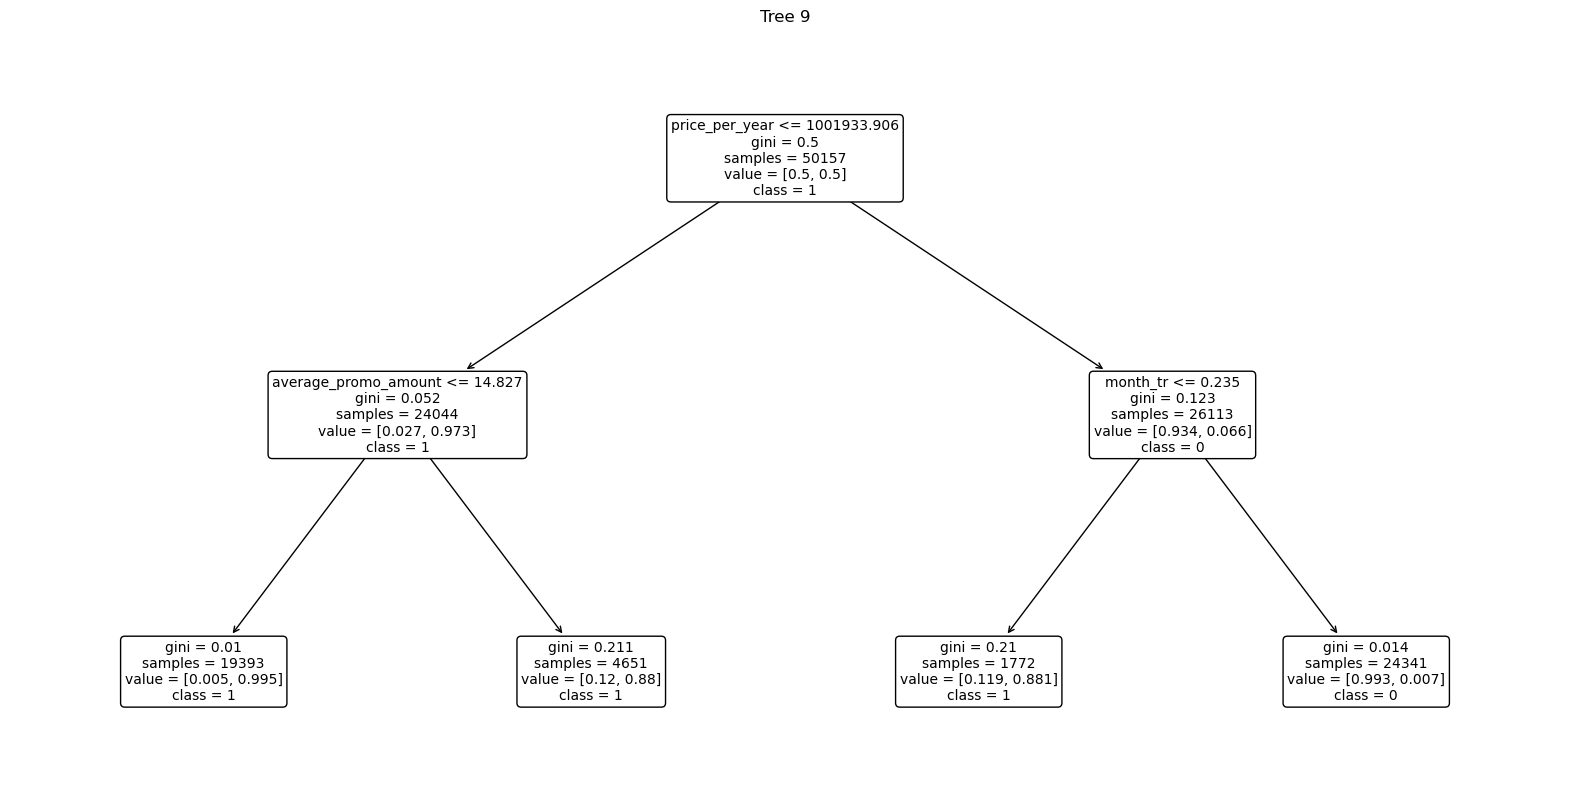

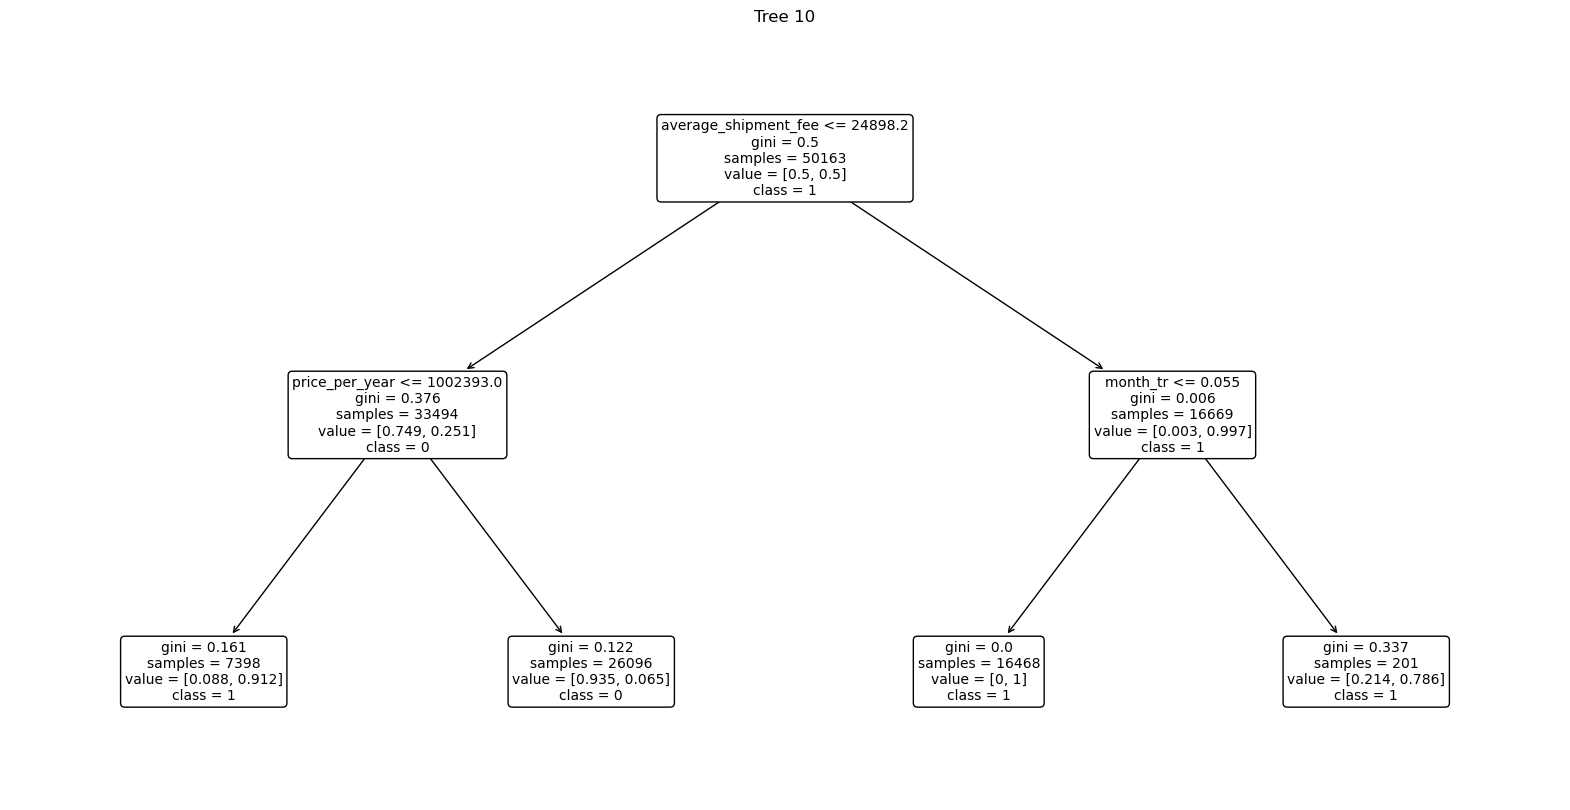

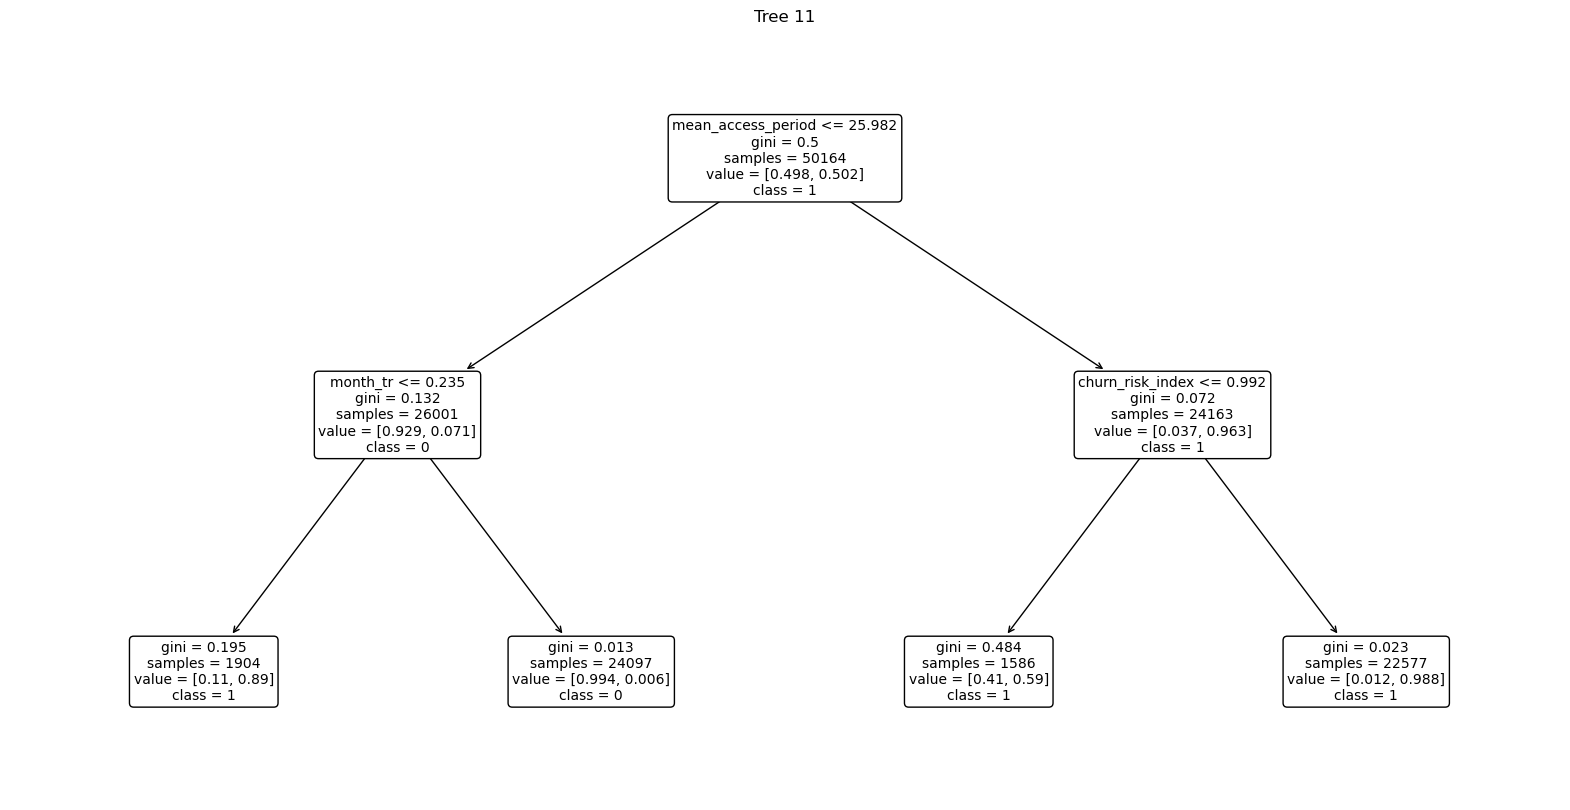

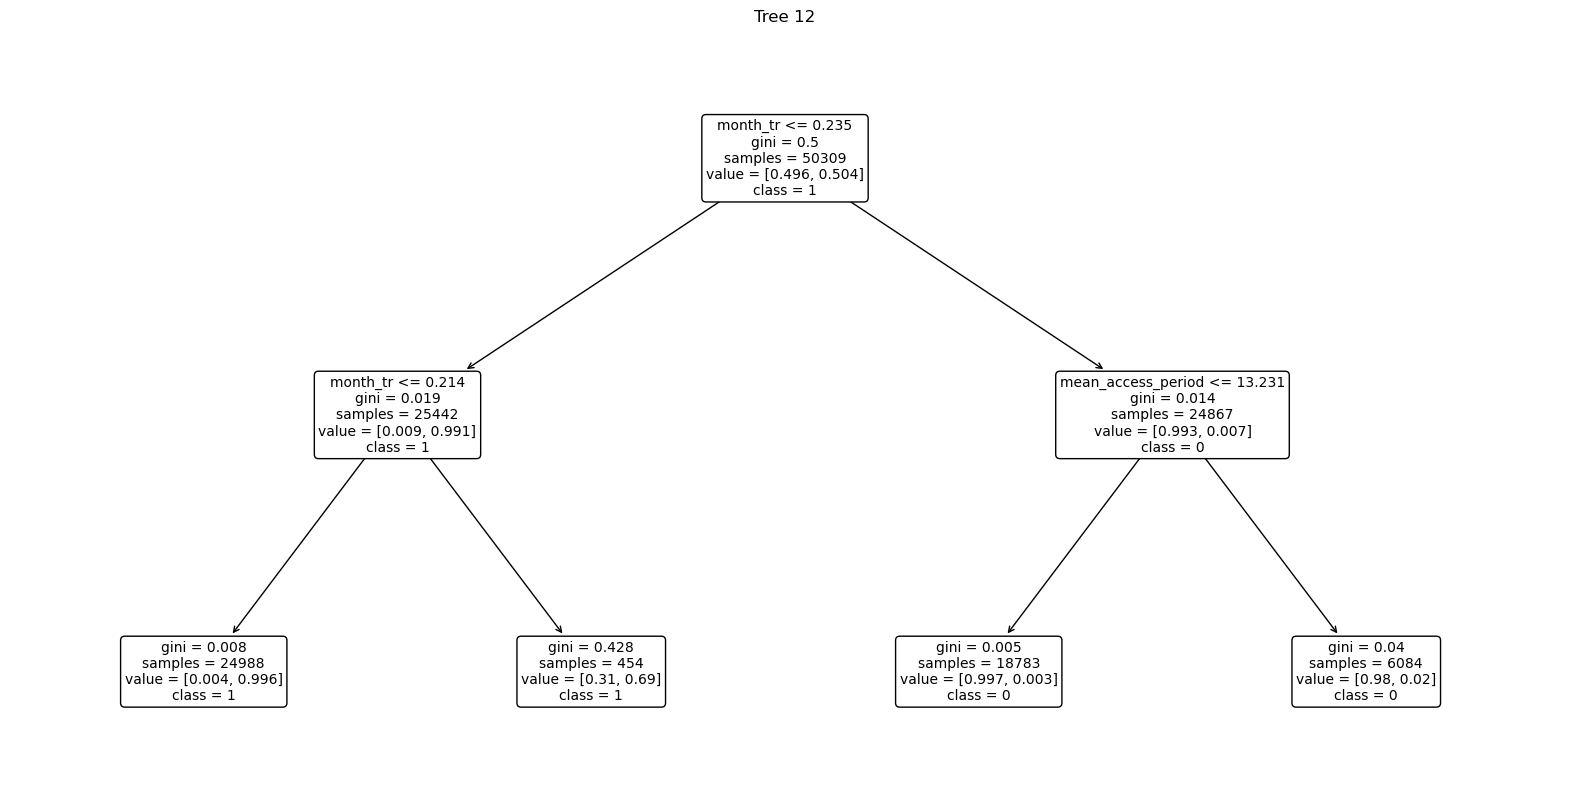

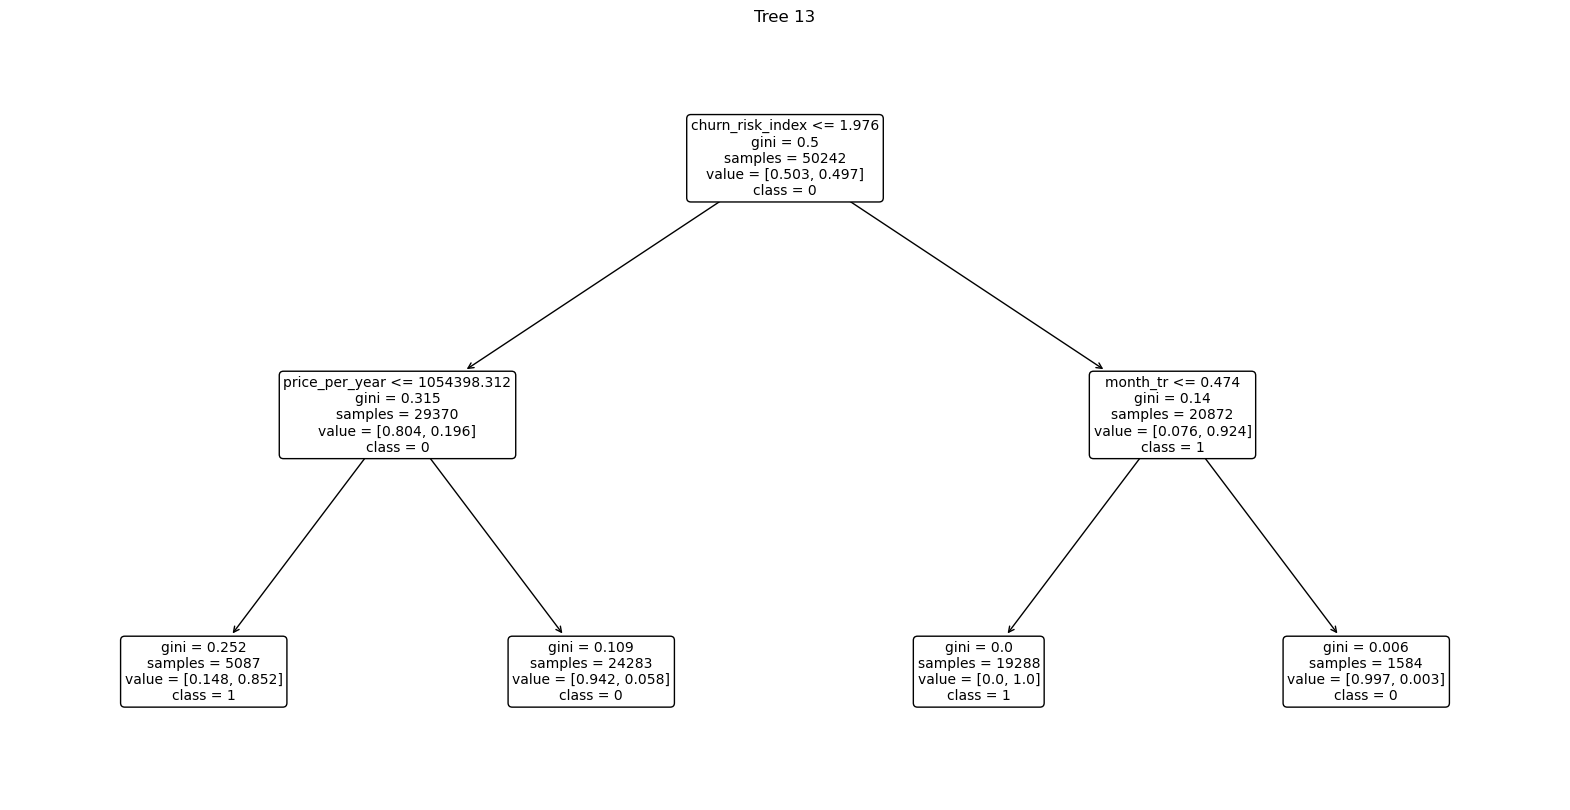

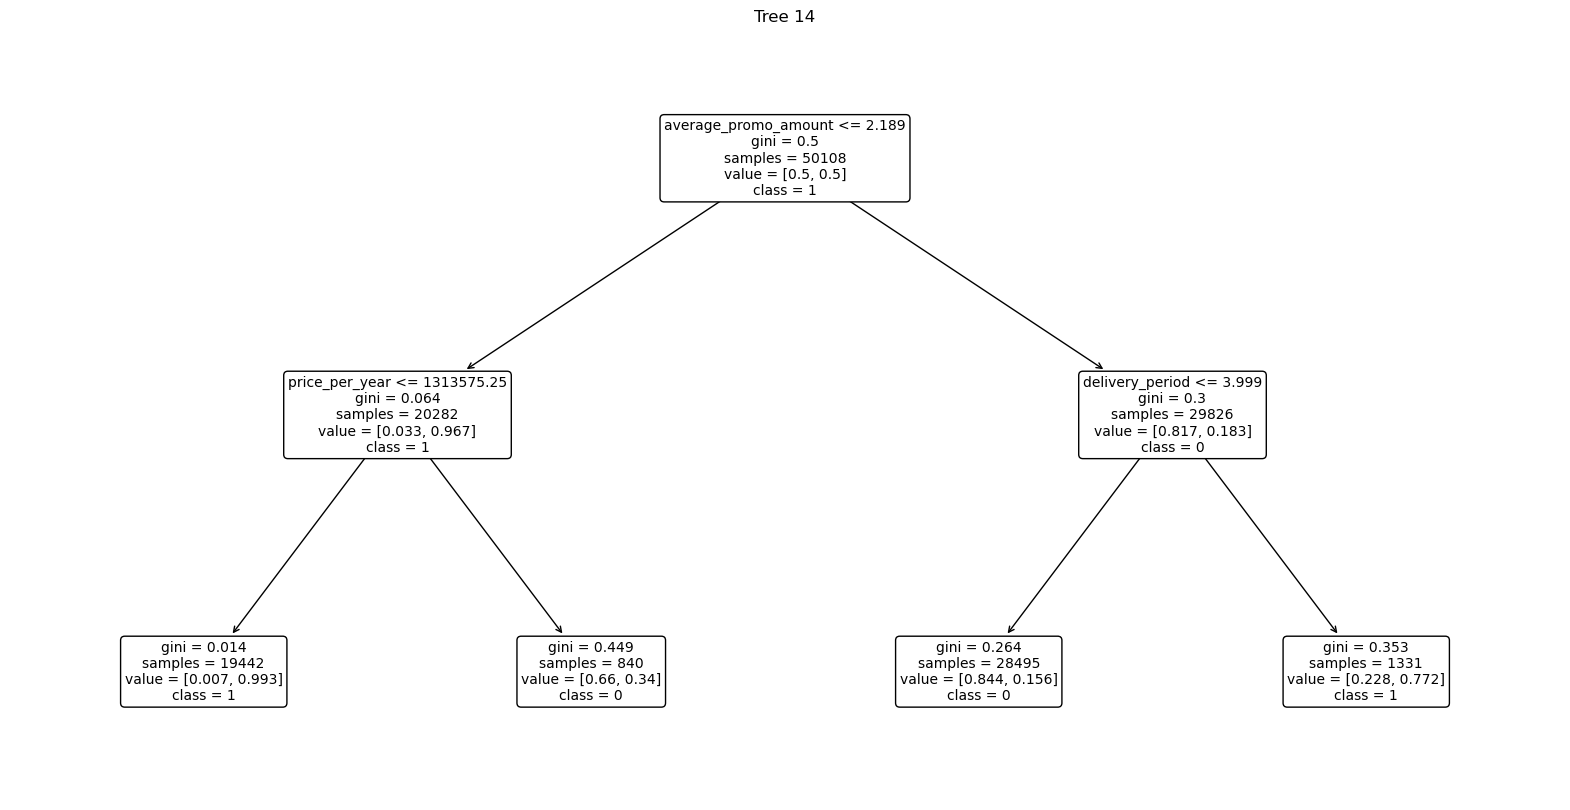

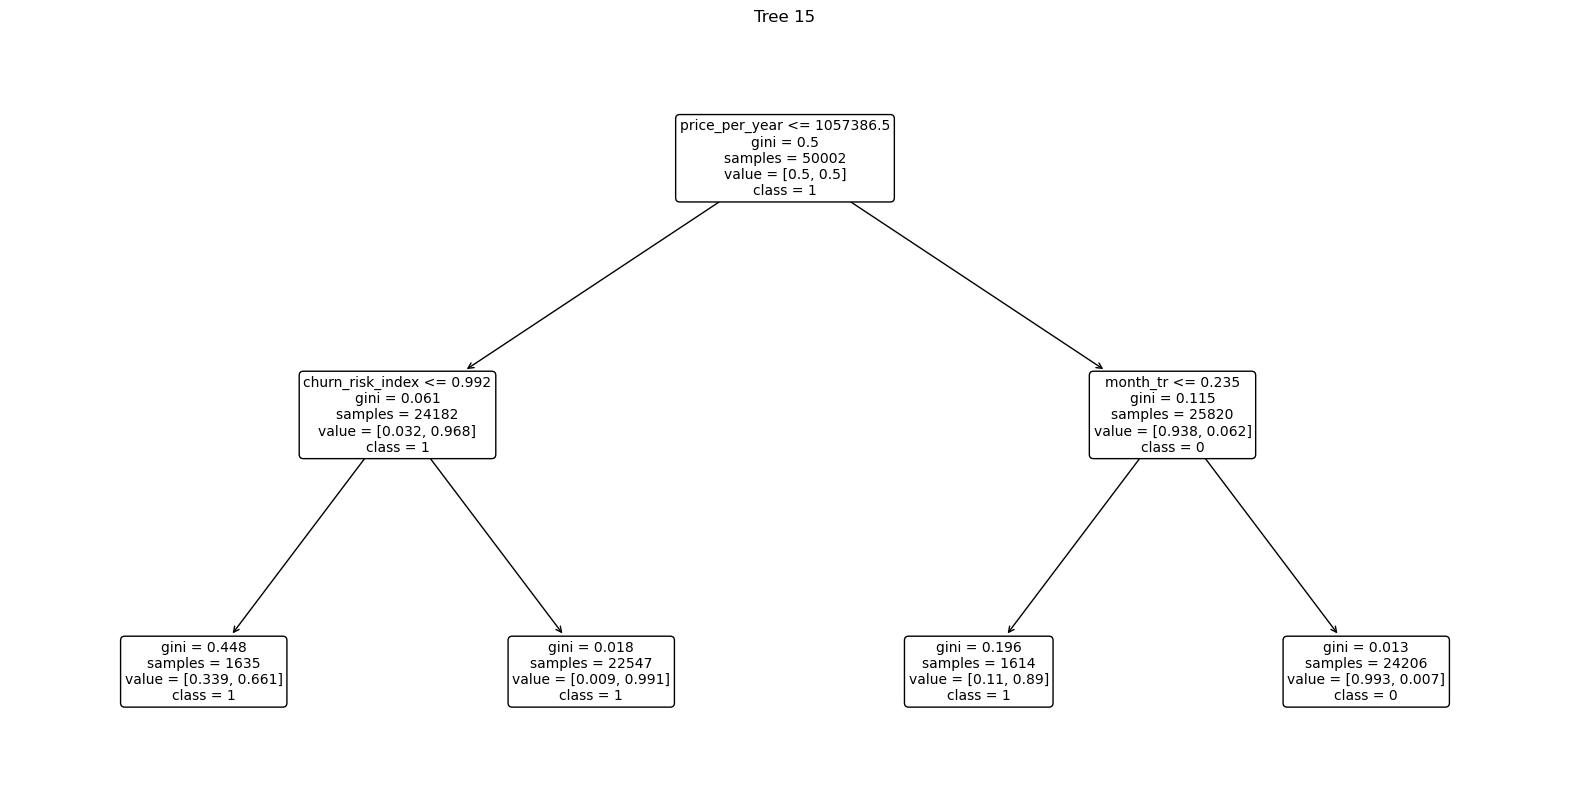

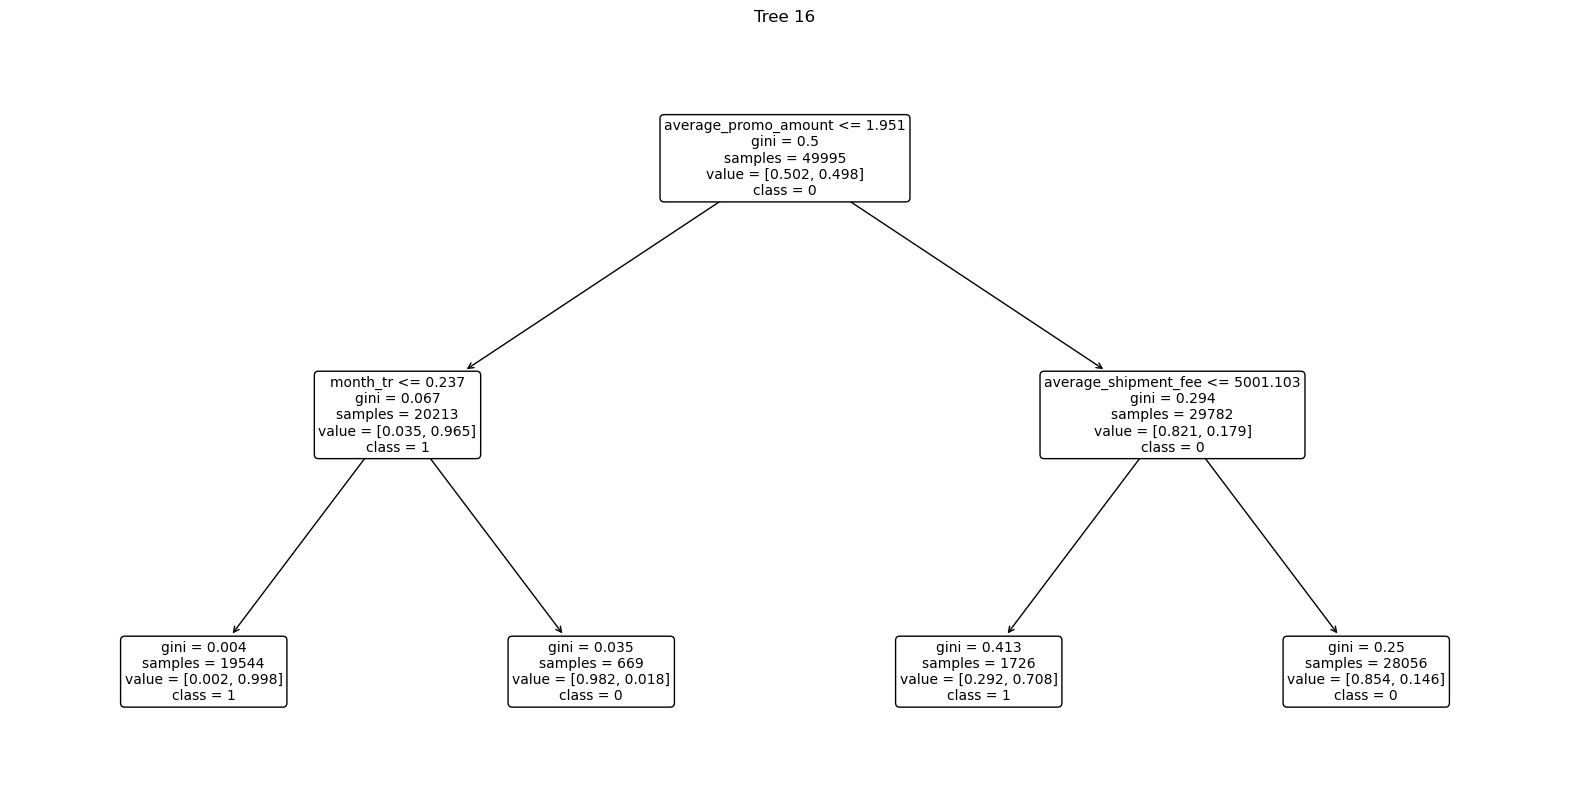

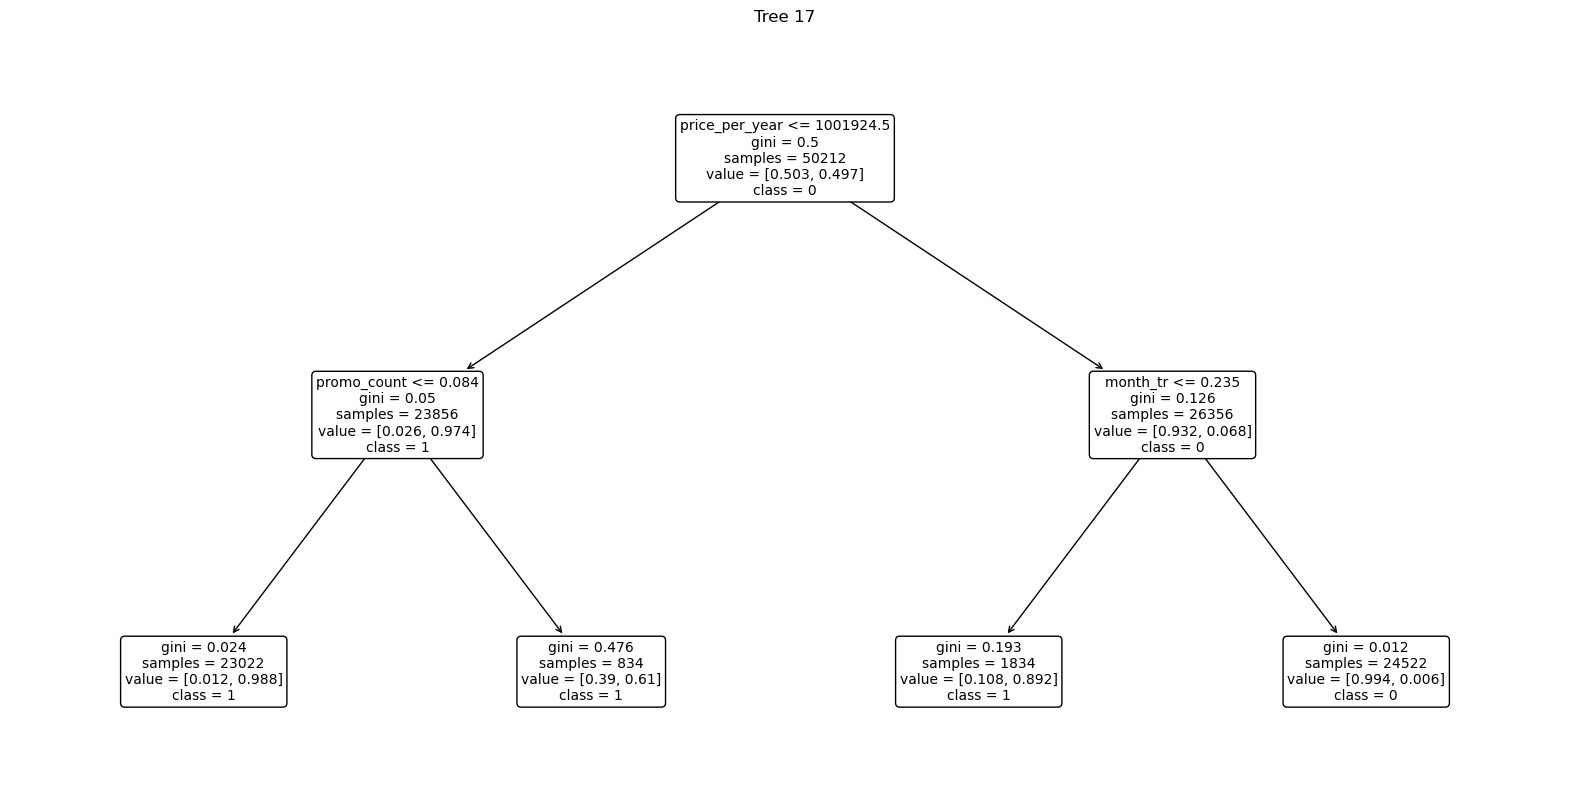

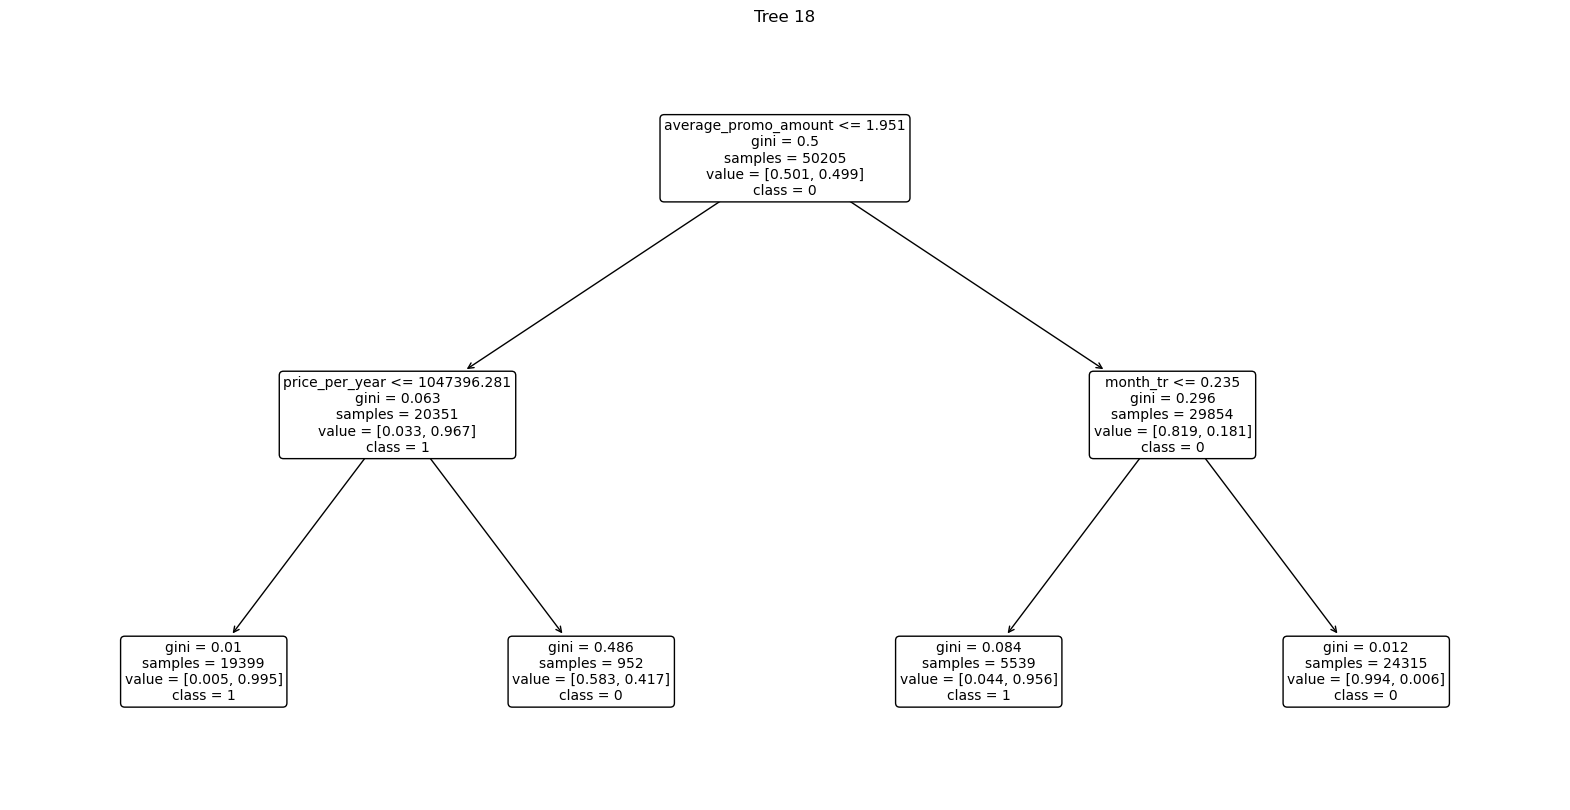

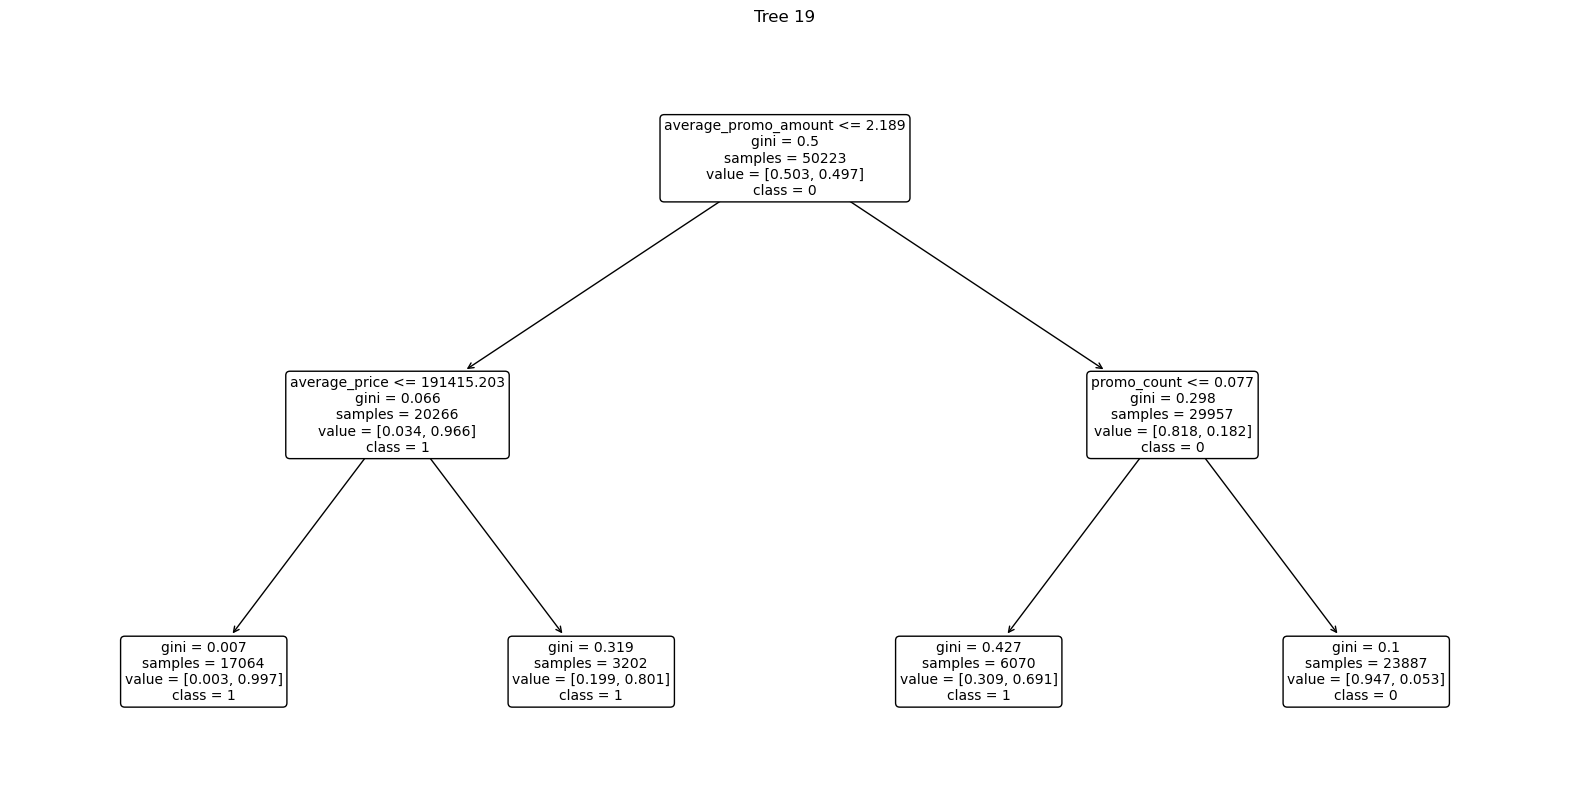

In [125]:
# 저장하고 싶은 경우
from sklearn.tree import export_graphviz
import os

# 트리의 수만큼 순환하며 각각의 트리를 그립니다.
for idx, tree in enumerate(even_simpler_rf.estimators_):
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=X_resampled.columns.tolist(), class_names=['0', '1'], rounded=True, fontsize=10)
    plt.title(f"Tree {idx}")
    
    # 트리를 별도의 파일로 저장하고 싶은 경우 아래 코드 사용
    # export_graphviz(tree, out_file=f"tree_{idx}.dot", feature_names=X_resampled.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True)
    
    plt.show()


In [126]:
'''
랜덤 포레스트의 과적합을 해결하기 위한 일반적인 방법은 다음과 같습니다:

트리의 최대 깊이 제한 (max_depth): 트리의 깊이를 제한하여 모델의 복잡도를 줄일 수 있습니다. 이렇게 함으로써 각 트리가 학습 데이터의 노이즈나 미세한 변동성에 과도하게 반응하는 것을 방지할 수 있습니다.

리프 노드의 최소 샘플 수 조정 (min_samples_leaf): 리프 노드에 필요한 최소한의 샘플 수를 늘리면, 트리가 너무 세분화되는 것을 방지할 수 있습니다.

노드 분할의 최소 샘플 수 조정 (min_samples_split): 분할을 위해 필요한 최소 샘플 수를 조정하여, 노드가 너무 쉽게 분할되는 것을 방지합니다.

사용하는 특성의 수 제한 (max_features): 각 트리가 분할 시 고려하는 특성의 수를 제한하여, 모델의 무작위성을 증가시킵니다. 이로 인해 각 트리의 다양성이 증가하고, 과적합을 방지하는 효과가 있습니다.

트리의 수 조정 (n_estimators): 사용하는 트리의 수를 줄이면 모델의 복잡도가 감소할 수 있지만, 너무 적은 트리를 사용하면 성능이 저하될 수 있으므로 적절한 균형이 필요합니다.

부트스트랩 샘플링 (bootstrap): 부트스트랩 샘플링을 사용하면 각 트리가 학습하는 데이터의 다양성이 증가합니다. 만약 bootstrap=False로 설정되어 있다면, 이를 True로 바꾸어 과적합을 감소시킬 수 있습니다.

규제 매개변수 사용: 랜덤 포레스트는 기본적으로 규제를 사용하지 않지만, 일부 구현체에서는 L1, L2 규제 등을 사용할 수 있습니다.

피처 중요도 확인: 랜덤 포레스트는 각 피처의 중요도를 제공합니다. 중요하지 않은 피처들을 제거하여 모델의 복잡도를 줄일 수 있습니다.

교차 검증 (Cross Validation) 사용: 교차 검증을 통해 다양한 데이터 세트에 대한 모델의 성능을 확인하고, 과적합 여부를 판단합니다.
'''

'\n랜덤 포레스트의 과적합을 해결하기 위한 일반적인 방법은 다음과 같습니다:\n\n트리의 최대 깊이 제한 (max_depth): 트리의 깊이를 제한하여 모델의 복잡도를 줄일 수 있습니다. 이렇게 함으로써 각 트리가 학습 데이터의 노이즈나 미세한 변동성에 과도하게 반응하는 것을 방지할 수 있습니다.\n\n리프 노드의 최소 샘플 수 조정 (min_samples_leaf): 리프 노드에 필요한 최소한의 샘플 수를 늘리면, 트리가 너무 세분화되는 것을 방지할 수 있습니다.\n\n노드 분할의 최소 샘플 수 조정 (min_samples_split): 분할을 위해 필요한 최소 샘플 수를 조정하여, 노드가 너무 쉽게 분할되는 것을 방지합니다.\n\n사용하는 특성의 수 제한 (max_features): 각 트리가 분할 시 고려하는 특성의 수를 제한하여, 모델의 무작위성을 증가시킵니다. 이로 인해 각 트리의 다양성이 증가하고, 과적합을 방지하는 효과가 있습니다.\n\n트리의 수 조정 (n_estimators): 사용하는 트리의 수를 줄이면 모델의 복잡도가 감소할 수 있지만, 너무 적은 트리를 사용하면 성능이 저하될 수 있으므로 적절한 균형이 필요합니다.\n\n부트스트랩 샘플링 (bootstrap): 부트스트랩 샘플링을 사용하면 각 트리가 학습하는 데이터의 다양성이 증가합니다. 만약 bootstrap=False로 설정되어 있다면, 이를 True로 바꾸어 과적합을 감소시킬 수 있습니다.\n\n규제 매개변수 사용: 랜덤 포레스트는 기본적으로 규제를 사용하지 않지만, 일부 구현체에서는 L1, L2 규제 등을 사용할 수 있습니다.\n\n피처 중요도 확인: 랜덤 포레스트는 각 피처의 중요도를 제공합니다. 중요하지 않은 피처들을 제거하여 모델의 복잡도를 줄일 수 있습니다.\n\n교차 검증 (Cross Validation) 사용: 교차 검증을 통해 다양한 데이터 세트에 대한 모델의 성능을 확인하고, 과적합 여부를 판단합니다.\n'

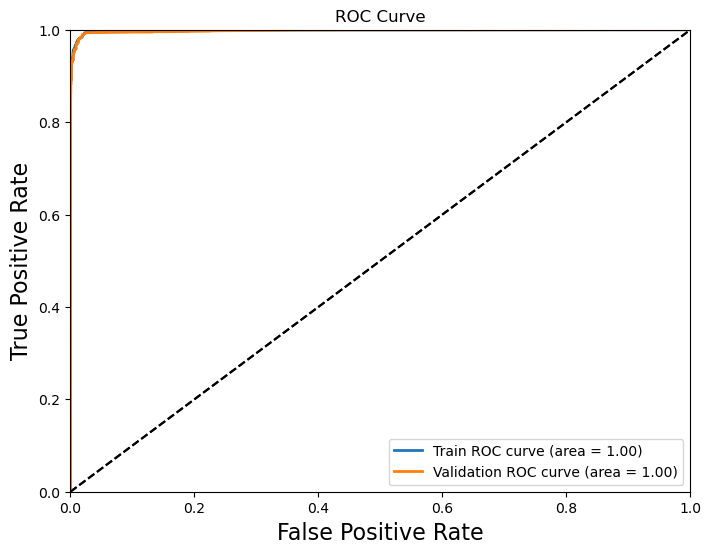

In [127]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# 훈련 데이터에 대한 예측 확률
y_train_prob = even_simpler_rf.predict_proba(X_resampled)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_resampled, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# 검증 데이터에 대한 예측 확률
y_val_prob = even_simpler_rf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train, tpr_train, "Train ROC curve (area = {:.2f})".format(roc_auc_train))
plot_roc_curve(fpr_val, tpr_val, "Validation ROC curve (area = {:.2f})".format(roc_auc_val))
plt.legend(loc="lower right")
plt.title("ROC Curve")
plt.show()


In [128]:
new_customers_df3 = new_customers_df.copy()
new_customers_df3

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
11,1,0.000000,0.000000,0.000000,0.0,2,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,43.000000
21,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,113.000000
35,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,77.000000
50,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,63.000000
68,0,1.333333,213487.500000,0.666667,3259.5,3,1.750000,6250.000000,456.951921,0.888889,4.390025e+06,7.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
96205,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,120.000000
96242,0,0.750000,204793.000000,0.500000,5308.0,4,2.000000,5000.000000,177.813802,0.960000,5.056764e+06,16.500000
96245,1,0.500000,105107.000000,0.000000,0.0,2,4.000000,10000.000000,1448.203703,0.222679,1.036866e+06,35.000000
96249,1,0.000000,0.000000,0.000000,0.0,1,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1.000000


In [129]:
# 1. 전처리: 원-핫 인코딩 적용
#new_customers_encoded = pd.get_dummies(new_customers_df3, columns=categorical_features, drop_first=True)
new_customers_encoded = new_customers_df3
# 'churn' 컬럼 제거 (모델 입력으로 사용되지 않음)
X_new_customers = new_customers_encoded.drop(columns=['churn'])

# 학습 데이터에만 존재하는 원-핫 인코딩된 컬럼을 신규 데이터에도 동일하게 적용
missing_cols = set(X_train.columns) - set(X_new_customers.columns)
for c in missing_cols:
    X_new_customers[c] = 0

# 컬럼 순서 맞추기
X_new_customers = X_new_customers[X_train.columns]

# 2. 예측
y_new_customers_pred = even_simpler_rf.predict(X_new_customers)

# 3. 결과 해석
new_customers_df3['predicted_churn'] = y_new_customers_pred

print(new_customers_df3[['churn', 'predicted_churn']])


       churn  predicted_churn
11         1                1
21         1                1
35         1                1
50         1                1
68         0                0
...      ...              ...
96205      1                1
96242      0                0
96245      1                0
96249      1                1
96271      0                0

[7842 rows x 2 columns]


In [130]:
new_customers_df3['churn'].value_counts()


1    5844
0    1998
Name: churn, dtype: int64

In [131]:
new_customers_df3['predicted_churn'].value_counts()


1    5102
0    2740
Name: predicted_churn, dtype: int64

In [132]:
true_labels = new_customers_df3['churn']
predicted_labels = new_customers_df3['predicted_churn']

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Model Accuracy: {accuracy * 100:.2f}%") # 정확도. 
print(f"Precision: {precision * 100:.2f}%") # 정밀도. 모델이 이탈로 예측한 고객 중 실제 이탈률
print(f"Recall: {recall * 100:.2f}%") # 재현율. 실제 이탈 고객을 모델이 이탈이라고 예측한 비율
print(f"F1 Score: {f1 * 100:.2f}%") # 정밀도와 재현율의 조화 평균. 두 지표 사의 균형 평가



Model Accuracy: 90.46%
Precision: 99.94%
Recall: 87.25%
F1 Score: 93.17%


In [133]:
df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


# 그래디언트 부스팅 머신(GBM) 사용

트리기반 모델이므로 정규화가 필수적이지 않음

In [134]:
df

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
0,1,0.000000,0.000000,0.000000,0.000000,37,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1106.000000
1,1,0.000000,0.000000,0.000000,0.000000,61,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1841.000000
2,0,3.291667,414681.556962,0.708333,5386.117647,24,3.075949,8860.759494,752.832362,0.226744,2.472727e+07,4.078261
3,1,0.000000,0.000000,0.000000,0.000000,10,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,301.000000
4,1,0.062500,115702.000000,0.000000,0.000000,16,1.000000,0.000000,0.000000,2.996627,8.853507e+04,471.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88431,0,1.590909,324990.142857,0.545455,7045.166667,22,3.400000,8000.000000,522.233922,0.209877,8.936760e+06,5.897727
88432,0,0.719298,557404.097561,0.228070,5376.692308,57,3.097561,9634.146341,1443.259657,0.767386,6.614419e+06,8.745665
88433,0,2.042553,376070.156250,0.765957,4931.111111,47,3.145833,8489.583333,1101.739088,0.136396,1.450559e+07,5.285024
88434,1,0.000000,0.000000,0.000000,0.000000,27,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,791.000000


In [135]:
GBM_df = df.copy()

In [136]:
# 범주형 데이터 컬럼 선택
#categorical_features = ['gender']

# 원핫인코딩 적용
#X_encoded = pd.get_dummies(GBM_df, columns=categorical_features, drop_first=True)

X_encoded = GBM_df

# 훈련:검증:시험 데이터 분할
X = X_encoded.drop(columns=['churn','month_tr']) # month_tr 컬럼의 특성 중요도가 압도적이라 제거.
#X = X_encoded.drop(columns=['churn'])
y = X_encoded['churn']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [137]:
# Gradient Boosting Machine 모델 초기화
base_gbm = GradientBoostingClassifier(random_state=42)

# 모델 훈련
base_gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [138]:
# 예측
y_train_pred = base_gbm.predict(X_train)
y_val_pred = base_gbm.predict(X_val)

# 성능 평가 함수
def print_metrics(true, pred, dataset_type):
    print(f"Metrics for {dataset_type}:")
    print(f"Accuracy: {accuracy_score(true, pred):.4f}")
    print(f"Precision: {precision_score(true, pred):.4f}")
    print(f"Recall: {recall_score(true, pred):.4f}")
    print(f"F1-Score: {f1_score(true, pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(true, pred):.4f}")
    print("-" * 30)

# 성능 출력
print("베이스 모델")
print_metrics(y_train, y_train_pred, "훈련 데이터")
print_metrics(y_val, y_val_pred, "검증 데이터")


베이스 모델
Metrics for 훈련 데이터:
Accuracy: 0.9809
Precision: 0.9881
Recall: 0.9864
F1-Score: 0.9872
ROC-AUC: 0.9755
------------------------------
Metrics for 검증 데이터:
Accuracy: 0.9789
Precision: 0.9870
Recall: 0.9847
F1-Score: 0.9858
ROC-AUC: 0.9731
------------------------------


In [139]:
y_test_pred = base_gbm.predict(X_test)
print_metrics(y_test, y_test_pred, "시험 데이터")

Metrics for 시험 데이터:
Accuracy: 0.9803
Precision: 0.9892
Recall: 0.9846
F1-Score: 0.9869
ROC-AUC: 0.9758
------------------------------


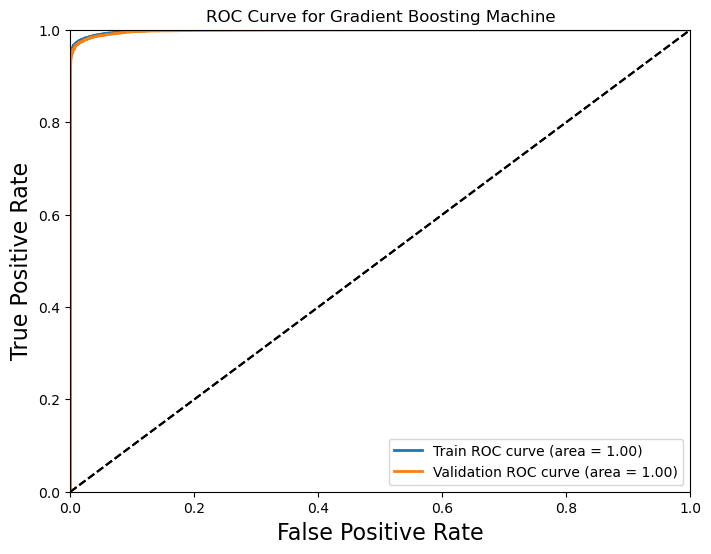

In [140]:
# ROC 커브 그리는 함수
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# 훈련 데이터에 대한 예측 확률
y_train_prob = base_gbm.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# 검증 데이터에 대한 예측 확률
y_val_prob = base_gbm.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train, tpr_train, "Train ROC curve (area = {:.2f})".format(roc_auc_train))
plot_roc_curve(fpr_val, tpr_val, "Validation ROC curve (area = {:.2f})".format(roc_auc_val))
plt.legend(loc="lower right")
plt.title("ROC Curve for Gradient Boosting Machine")
plt.show()


In [141]:
'''
# 그리드 서치를 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=base_gbm, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
'''

'\n# 그리드 서치를 위한 파라미터 그리드 설정\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [3, 4, 5],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# 그리드 서치 객체 생성\ngrid_search = GridSearchCV(estimator=base_gbm, param_grid=param_grid, \n                           cv=3, n_jobs=-1, verbose=2, scoring=\'accuracy\')\n\n# 그리드 서치 실행\ngrid_search.fit(X_train, y_train)\n\n# 최적의 파라미터와 성능 출력\nprint("Best parameters found: ", grid_search.best_params_)\nprint("Best cross-validation score: {:.4f}".format(grid_search.best_score_))\n'

In [142]:
'''
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 1.0000
'''


"\nBest parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}\nBest cross-validation score: 1.0000\n"

In [143]:
# 최적의 파라미터로 개선된 그래디언트 부스팅 머신 모델 생성
improved_gbm = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.01,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=42
)

# 모델 학습
improved_gbm.fit(X_train, y_train)

# 훈련 데이터 예측
y_train_pred_improved = improved_gbm.predict(X_train)

# 검증 데이터 예측
y_val_pred_improved = improved_gbm.predict(X_val)

# 훈련, 검증 데이터 세트별 성능 출력
print_metrics(y_train, y_train_pred_improved, "Training")
print_metrics(y_val, y_val_pred_improved, "Validation")


Metrics for Training:
Accuracy: 0.9711
Precision: 0.9789
Recall: 0.9826
F1-Score: 0.9807
ROC-AUC: 0.9599
------------------------------
Metrics for Validation:
Accuracy: 0.9696
Precision: 0.9776
Recall: 0.9818
F1-Score: 0.9797
ROC-AUC: 0.9576
------------------------------


정규화의 목적은 모델의 복잡도를 제어하고 과적합을 방지하기 위해 사용됩니다. 

learning_rate를 낮추고, max_depth를 줄이고, min_samples_split를 늘리는 등의 조작을 통해 모델이 간단하고 일반화된 형태를 유지할 수 있도록 합니다.

In [144]:
# SMOTE 인스턴스 생성
smote = SMOTE(random_state=42)

# 리샘플링 전의 클래스 분포 확인
print('Original dataset shape:', Counter(y_train))

# 훈련 데이터에 오버샘플링 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 샘플링된 데이터 크기 확인
print('Resampled dataset shape:', Counter(y_train_resampled))

Original dataset shape: Counter({1: 39663, 0: 13398})
Resampled dataset shape: Counter({1: 39663, 0: 39663})


In [145]:
# 최적의 파라미터로 개선된 그래디언트 부스팅 머신 모델 생성
improved_gbm = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=3, # 줄임
    learning_rate=0.003, # 낮춤
    min_samples_split=25, # 늘림
    min_samples_leaf=3,
    random_state=42
)

# 모델 학습
improved_gbm.fit(X_train_resampled, y_train_resampled)

# 훈련 데이터 예측
y_train_pred_improved = improved_gbm.predict(X_train_resampled)

# 검증 데이터 예측
y_val_pred_improved = improved_gbm.predict(X_val)

# 훈련, 검증 데이터 세트별 성능 출력
print_metrics(y_train_resampled, y_train_pred_improved, "Training")
print_metrics(y_val, y_val_pred_improved, "Validation")


Metrics for Training:
Accuracy: 0.9673
Precision: 0.9815
Recall: 0.9526
F1-Score: 0.9668
ROC-AUC: 0.9673
------------------------------
Metrics for Validation:
Accuracy: 0.9593
Precision: 0.9931
Recall: 0.9522
F1-Score: 0.9722
ROC-AUC: 0.9662
------------------------------


In [146]:
# 테스트 데이터 예측
y_test_pred_improved = improved_gbm.predict(X_test)

# 테스트 데이터 세트에 대한 성능 출력
print_metrics(y_test, y_test_pred_improved, "Test")


Metrics for Test:
Accuracy: 0.9570
Precision: 0.9933
Recall: 0.9495
F1-Score: 0.9709
ROC-AUC: 0.9648
------------------------------


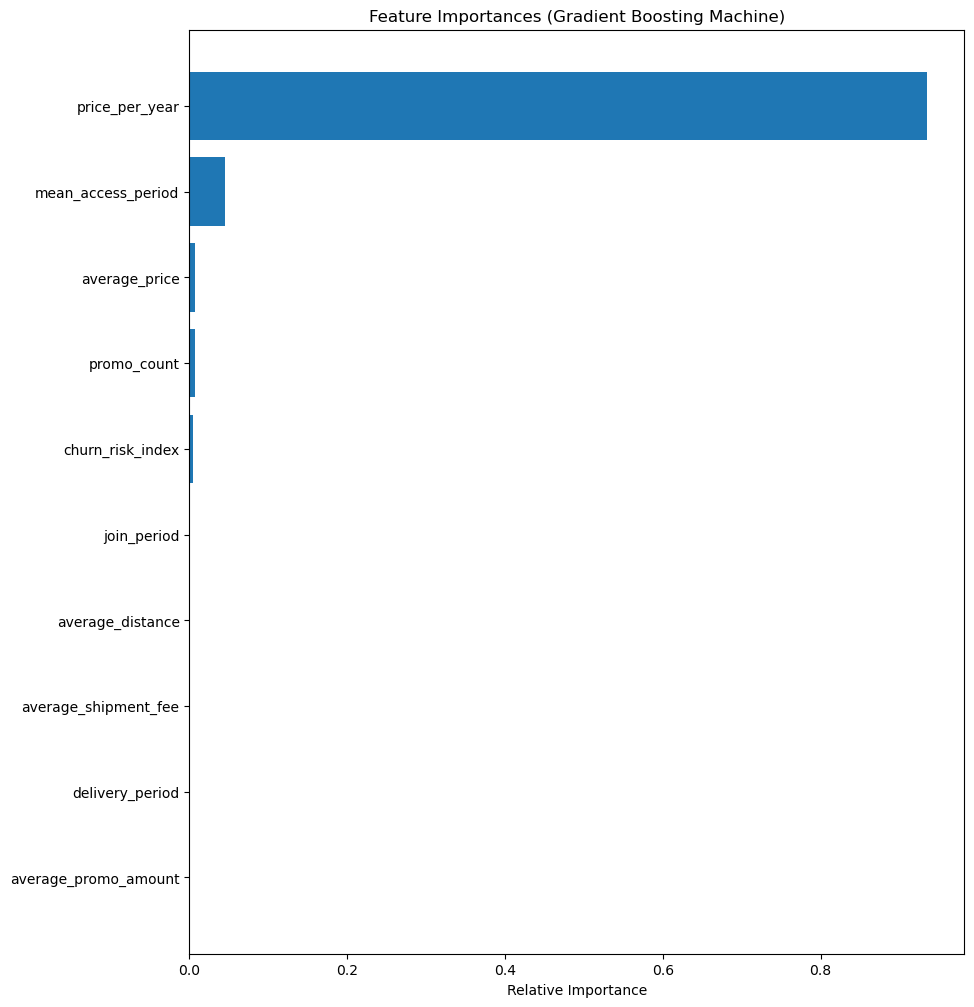

In [147]:

# 특성 중요도 추출
feature_importances = improved_gbm.feature_importances_

# 특성 중요도를 내림차순으로 정렬
sorted_idx = np.argsort(feature_importances)[::-1]

# 특성의 이름을 가져오기 위해 X_train의 column을 사용합니다.
# X_train이 정의되지 않은 경우 해당 변수명으로 변경해주세요.
features = X_train_resampled.columns

# 시각화
plt.figure(figsize=(10, 12))
plt.title("Feature Importances (Gradient Boosting Machine)")
plt.barh(range(X_train_resampled.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train_resampled.shape[1]), features[sorted_idx])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis() # y축 순서 뒤집기 (중요도가 높은 특성이 위로 오게 함)
plt.show()


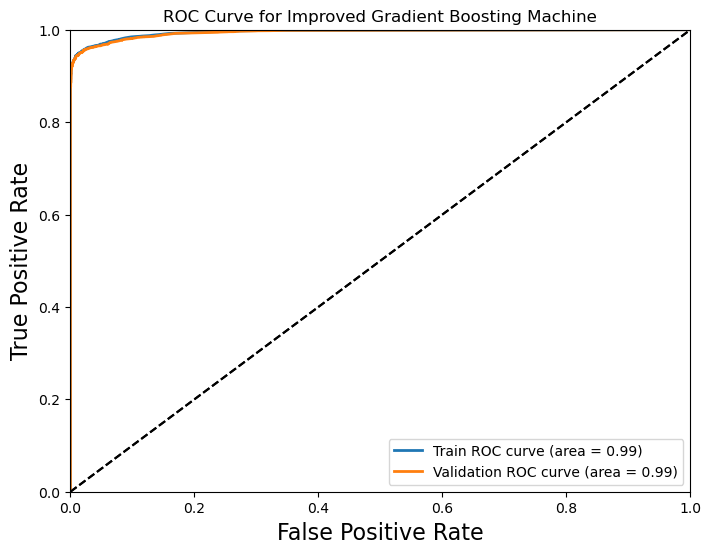

In [148]:
# 훈련 데이터에 대한 예측 확률
y_train_prob_improved = improved_gbm.predict_proba(X_train_resampled)[:, 1]

fpr_train_improved, tpr_train_improved, thresholds_train_improved = roc_curve(y_train_resampled, y_train_prob_improved)

roc_auc_train_improved = auc(fpr_train_improved, tpr_train_improved)

# 검증 데이터에 대한 예측 확률
y_val_prob_improved = improved_gbm.predict_proba(X_val)[:, 1]
fpr_val_improved, tpr_val_improved, thresholds_val_improved = roc_curve(y_val, y_val_prob_improved)
roc_auc_val_improved = auc(fpr_val_improved, tpr_val_improved)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_train_improved, tpr_train_improved, "Train ROC curve (area = {:.2f})".format(roc_auc_train_improved))
plot_roc_curve(fpr_val_improved, tpr_val_improved, "Validation ROC curve (area = {:.2f})".format(roc_auc_val_improved))
plt.legend(loc="lower right")
plt.title("ROC Curve for Improved Gradient Boosting Machine")
plt.show()


In [149]:
new_customers_df4 = new_customers_df.copy()

new_customers_df4

,churn,month_tr,average_price,promo_count,average_promo_amount,join_period,delivery_period,average_shipment_fee,average_distance,churn_risk_index,price_per_year,mean_access_period
11,1,0.000000,0.000000,0.000000,0.0,2,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,43.000000
21,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,113.000000
35,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,77.000000
50,1,0.000000,0.000000,0.000000,0.0,3,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,63.000000
68,0,1.333333,213487.500000,0.666667,3259.5,3,1.750000,6250.000000,456.951921,0.888889,4.390025e+06,7.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
96205,1,0.000000,0.000000,0.000000,0.0,4,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,120.000000
96242,0,0.750000,204793.000000,0.500000,5308.0,4,2.000000,5000.000000,177.813802,0.960000,5.056764e+06,16.500000
96245,1,0.500000,105107.000000,0.000000,0.0,2,4.000000,10000.000000,1448.203703,0.222679,1.036866e+06,35.000000
96249,1,0.000000,0.000000,0.000000,0.0,1,6.000000,50000.000000,4052.667143,1.975650,0.000000e+00,1.000000


In [150]:
# 1. 전처리: 원-핫 인코딩 적용
#new_customers_encoded = pd.get_dummies(new_customers_df4, columns=categorical_features, drop_first=True)
new_customers_encoded = new_customers_df4

# 'churn' 컬럼 제거 (모델 입력으로 사용되지 않음)
X_new_customers = new_customers_encoded.drop(columns=['churn'])

# 학습 데이터에만 존재하는 원-핫 인코딩된 컬럼을 신규 데이터에도 동일하게 적용
missing_cols = set(X_train.columns) - set(X_new_customers.columns)
for c in missing_cols:
    X_new_customers[c] = 0

# 컬럼 순서 맞추기
X_new_customers = X_new_customers[X_train.columns]

# 2. 예측
y_new_customers_pred = improved_gbm.predict(X_new_customers)

# 3. 결과 해석
new_customers_df4['predicted_churn'] = y_new_customers_pred

print(new_customers_df4[['churn', 'predicted_churn']])

       churn  predicted_churn
11         1                1
21         1                1
35         1                1
50         1                1
68         0                0
...      ...              ...
96205      1                1
96242      0                0
96245      1                0
96249      1                1
96271      0                0

[7842 rows x 2 columns]


In [151]:
new_customers_df4['churn'].value_counts()


1    5844
0    1998
Name: churn, dtype: int64

In [152]:
new_customers_df4['predicted_churn'].value_counts()


1    5187
0    2655
Name: predicted_churn, dtype: int64

In [155]:
true_labels = new_customers_df4['churn']
predicted_labels = new_customers_df4['predicted_churn']

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f"Model Accuracy: {accuracy * 100:.2f}%") # 정확도. 
print(f"Precision: {precision * 100:.2f}%") # 정밀도. 모델이 이탈로 예측한 고객 중 실제 이탈률
print(f"Recall: {recall * 100:.2f}%") # 재현율. 실제 이탈 고객을 모델이 이탈이라고 예측한 비율
print(f"F1 Score: {f1 * 100:.2f}%") # 정밀도와 재현율의 조화 평균. 두 지표 사의 균형 평가



Model Accuracy: 91.32%
Precision: 99.77%
Recall: 88.55%
F1 Score: 93.83%


# 모델 사용 이유 (장단점)

## 로지스틱 회귀 (Logistic Regression)

### 장점

- 해석력: 로지스틱 회귀는 각 특성의 가중치를 직접적으로 제공하므로, 모델의 예측을 해석하기가 상대적으로 쉽습니다.
- 간단함: 로지스틱 회귀는 구현이 간단하고 빠르게 훈련됩니다.
- 효율성: 대량의 데이터셋에 대해 빠르게 결과를 도출합니다.
- 확률 출력: 목표 클래스의 확률을 직접적으로 제공하므로, 예측의 불확실성에 대한 정보를 얻을 수 있습니다. 임계값을 조절하며 다양한 비즈니스 요구 사항에 대응할 수 있습니다.
- 빠른 훈련 및 예측: 대규모 데이터셋에 대해서도 비교적 빠르게 결과를 도출합니다.

### 단점

- 선형 가정: 데이터의 비선형성을 다루기 어렵습니다. 이는 고객 이탈 예측에서 중요한 상호작용이나 비선형 패턴을 놓칠 수 있다는 것을 의미합니다.
- 특성 스케일링 필요: 모든 특성이 동일한 스케일을 가져야 합니다. 그렇지 않으면 학습이 잘 이루어지지 않을 수 있습니다.

## 랜덤 포레스트 (Random Forest)

### 장점

- 비선형 관계: 랜덤 포레스트는 복잡한 비선형 관계를 잘 포착할 수 있습니다.
- 특성 중요도: 각 특성의 중요도를 쉽게 파악할 수 있습니다.
- 과적합 감소: 부트스트랩 샘플링과 특성의 무작위 선택으로 인해 모델의 과적합을 줄일 수 있습니다.
- 높은 정확도: 다수의 트리를 결합하므로, 일반적으로 높은 성능을 보입니다.
- 별도의 특성 스케일링 불필요: 스케일링의 영향을 크게 받지 않습니다.

### 단점

- 해석력: 결정 트리에 비해 해석하기가 어렵습니다.
- 복잡한 모델: 다수의 트리를 포함하므로, 개별 예측을 해석하기 어렵습니다.
- 메모리 및 시간: 큰 데이터셋에서는 메모리 사용량이 많고 훈련 시간이 길어질 수 있습니다.

## 그래디언트 부스트 머신 (Gradient Boosting Machine, GBM)


### 장점

- 높은 성능: GBM은 일반적으로 다른 단일 모델에 비해 더 높은 성능을 보입니다.
- 특성 중요도: 랜덤 포레스트와 마찬가지로 각 특성의 중요도를 제공하여, 중요한 특성을 파악하는 데 도움을 줍니다.
- 높은 정확도: 다른 알고리즘에 비해 더 높은 정확도를 제공합니다.
- 과적합 방지: 규제 매개변수를 조정하여 과적합을 방지할 수 있습니다.

### 단점

- 훈련 시간: 특히 데이터셋이 큰 경우 훈련 시간이 길어질 수 있습니다.
- 매개변수 조정: 올바른 성능을 얻기 위해 매개변수를 잘 조정해야 합니다.

### 요약
로지스틱 회귀는 해석력이 높고 간단하며, 랜덤 포레스트와 GBM은 복잡한 비선형 관계를 잘 포착하며 높은 성능을 보입니다. 각 모델의 선택은 문제의 특성, 데이터의 복잡성 및 비즈니스 요구 사항에 따라 결정될 수 있습니다.

### 고객 이탈 예측에 이 모델들을 사용하는 이유:

- 해석력: 고객 이탈의 주요 원인을 파악하는 것은 매우 중요합니다. 이를 위해 모델의 해석력이 필요합니다. 로지스틱 회귀는 해석력이 뛰어나며, 랜덤 포레스트와 GBM은 특성 중요도를 제공합니다.
- 성능: 고객 이탈의 정확한 예측은 비즈니스에 큰 영향을 미칩니다. 랜덤 포레스트와 GBM은 일반적으로 높은 성능을 보이기 때문에 이러한 문제에 적합합니다.
- 데이터의 복잡성: 고객 데이터는 종종 복잡하고 비선형적인 패턴을 보입니다. 랜덤 포레스트와 GBM은 이러한 비선형 패턴을 잘 포착할 수 있습니다.
- 결과적으로, 이 모델들은 각각의 장점을 활용하여 고객 이탈 예측 문제에 효과적으로 접근할 수 있습니다.



# 성능지표 사용 이유

## Accuracy (정확도):

- 전체 예측 중 올바르게 예측된 것의 비율을 나타냅니다.
- 문제점: 불균형 데이터셋에서는 정확도만으로 모델의 성능을 판단하기 어려울 수 있습니다.

## Precision (정밀도):

- 양성으로 예측된 것 중에서 실제로 양성인 것의 비율입니다. 즉, 양성 예측의 정확성을 의미합니다.
- 고객 이탈 예측에서 높은 정밀도는 고객을 잘못 분류하여 불필요한 마케팅 자원을 낭비하는 것을 줄일 수 있습니다.

## Recall (재현율):

- 실제 양성 중에서 양성으로 예측된 것의 비율입니다.
- 고객 이탈 예측에서 높은 재현율은 실제로 이탈할 고객을 놓치지 않고 잡아내는 능력을 의미합니다.

## F1-Score:

- 정밀도와 재현율의 조화 평균입니다. 두 지표 사이의 균형을 나타내는 지표로, 불균형 데이터셋에서는 이 지표가 중요합니다.
- F1-Score는 정밀도와 재현율이 균형을 이루었을 때 최대값을 가집니다.